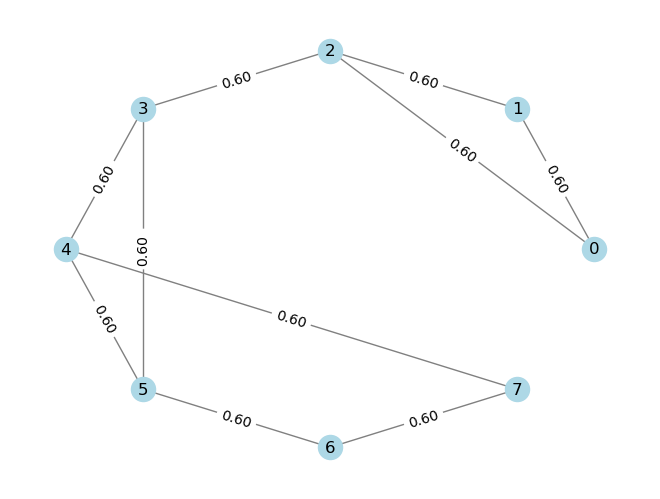

tensor(7.2000)
[[ 1.2       -0.6       -0.6       -0.        -0.        -0.
  -0.        -0.       ]
 [-0.6        1.2       -0.6       -0.        -0.        -0.
  -0.        -0.       ]
 [-0.6       -0.6        1.8000001 -0.6       -0.        -0.
  -0.        -0.       ]
 [-0.        -0.        -0.6        1.8000001 -0.6       -0.6
  -0.        -0.       ]
 [-0.        -0.        -0.        -0.6        1.8000001 -0.6
  -0.        -0.6      ]
 [-0.        -0.        -0.        -0.6       -0.6        1.8000001
  -0.6       -0.       ]
 [-0.        -0.        -0.        -0.        -0.        -0.6
   1.2       -0.6      ]
 [-0.        -0.        -0.        -0.        -0.6       -0.
  -0.6        1.2      ]]
tensor([[ 1.2000, -0.6000, -0.6000, -0.0000, -0.0000, -0.0000, -0.0000, -0.0000],
        [-0.6000,  1.2000, -0.6000, -0.0000, -0.0000, -0.0000, -0.0000, -0.0000],
        [-0.6000, -0.6000,  1.8000, -0.6000, -0.0000, -0.0000, -0.0000, -0.0000],
        [-0.0000, -0.0000, -0.6000,  1.8

In [1]:
from GEM_module import GEM
from utils import *
from scipy.sparse.csgraph import laplacian

# seed
torch.manual_seed(42)
torch.random.manual_seed(42)

# import os
# os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"


# generate synthetic data
edges = [[0,1],[0,2],[1,2],[2,3],[3,4],[4,5],[3,5],[5,6],[6,7], [4,7]]
edges = torch.tensor(edges)
weights = torch.tensor([0.6]*len(edges))
num_nodes = 8
adj = generate_graph_from_edges(num_nodes, edges, weights)
print(adj.norm()**2)
L = laplacian(adj.numpy(), normed=False)
print(L)
# generate data
sigma = 0.4
mu = sigma ** 2
n = 128
y = generate_y(num_nodes, sigma, L, n)

In [ ]:
def Experiment(arg_dict, num_node, S_init=None, seed=42):
    mu = arg_dict['mu']
    gamma = arg_dict['gamma']
    step_size = arg_dict['step_size']
    PGD_step_size = arg_dict['PGD_step_size']
    c = arg_dict['c']
    PGD_iters = arg_dict['PGD_iters']
    use_block_coordinate = arg_dict['use_block_coordinate']
    torch.manual_seed(seed)
    torch.random.manual_seed(seed)
    gem = GEM(num_nodes, mu=mu, gamma=gamma, step_size=step_size, c=c, PGD_iters=PGD_iters, PGD_step_size=PGD_step_size, use_block_coordinate=use_block_coordinate, scale=True)
    torch.manual_seed(42)
    # initialize adjacency and S
    # adj_init = torch.ones((num_nodes, num_nodes)) - torch.eye(num_nodes)  # all-one matrix with zero diagonal
    if S_init is None:
        S_init = torch.ones((num_nodes, num_nodes)) - torch.eye(num_nodes)  # all-one matrix with zero diagonal
 
    x_final, adj_final, S_final = gem(y, S_init, num_iters=5)
    W_final = adj_final * S_final
    print("Final learned mask:")
    print(S_final, S_final.norm()**2)
    print("Final learned adjacency matrix:")
    print(W_final, W_final.norm()**2)

# 6-node graph experiments - PGD (w/o BCD)
Settings: All random seed 42. 128 data points. Generating noise $\sigma=0.4$ (variance 0.16).

Testing parameters:
- GLR strength: $\mu=0.2, 0.1, 0.4$ (suitable, low, high)
- PGD step size $\eta=0.01, 0.02$ combined with iterations $N=100, 50$
- Sparsity control $\gamma=0.4, 0.2, 0.6$



Iteration 1/5
after E-step: delta_W norm 0.1767, GLR 10.9611, adj norm^2 15.3861
after M-step-1: delta_W norm 0.0439, GLR 10.8080, adj norm^2 15.3495
PGD iter 1/50, ||S_new - S||_F = 0.0717
PGD iter 21/50, ||S_new - S||_F = 0.0676
PGD iter 41/50, ||S_new - S||_F = 0.0618
tensor([[0.0000, 0.6639, 0.6944, 0.5798, 0.4853, 0.5636, 0.5386, 0.5089],
        [0.6639, 0.0000, 0.6841, 0.5142, 0.4186, 0.4637, 0.4078, 0.3506],
        [0.6944, 0.6841, 0.0000, 0.6049, 0.4755, 0.5578, 0.5000, 0.4358],
        [0.5798, 0.5142, 0.6049, 0.0000, 0.6949, 0.6548, 0.5752, 0.5933],
        [0.4853, 0.4186, 0.4755, 0.6949, 0.0000, 0.6500, 0.6362, 0.6619],
        [0.5636, 0.4637, 0.5578, 0.6548, 0.6500, 0.0000, 0.7261, 0.6551],
        [0.5386, 0.4078, 0.5000, 0.5752, 0.6362, 0.7261, 0.0000, 0.6855],
        [0.5089, 0.3506, 0.4358, 0.5933, 0.6619, 0.6551, 0.6855, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 1 tensor(1.7645, grad_fn=<PowBackward0>)


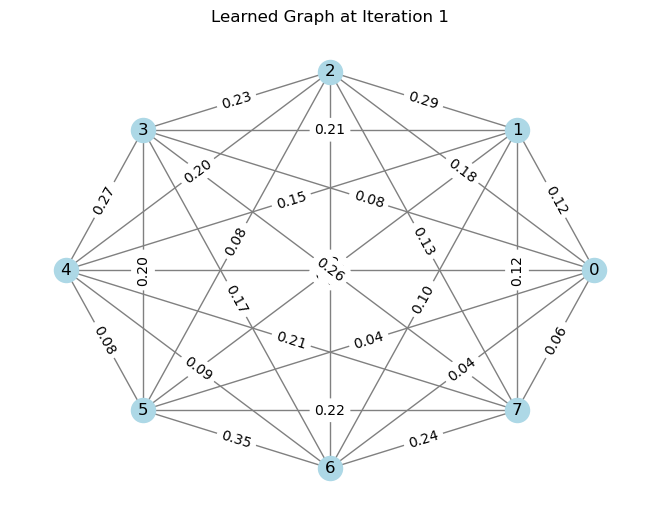

Iteration 2/5
after E-step: delta_W norm 0.0498, GLR 10.4041, adj norm^2 15.1447
after M-step-1: delta_W norm 0.0712, GLR 10.2431, adj norm^2 14.8260
PGD iter 1/50, ||S_new - S||_F = 0.0979
PGD iter 21/50, ||S_new - S||_F = 0.0919
PGD iter 41/50, ||S_new - S||_F = 0.0809
tensor([[0.0000, 0.6244, 0.6358, 0.4898, 0.2910, 0.4721, 0.4235, 0.3795],
        [0.6244, 0.0000, 0.6232, 0.3190, 0.1588, 0.2210, 0.1266, 0.0478],
        [0.6358, 0.6232, 0.0000, 0.4767, 0.2297, 0.4153, 0.3007, 0.1954],
        [0.4898, 0.3190, 0.4767, 0.0000, 0.6436, 0.5783, 0.4458, 0.4632],
        [0.2910, 0.1588, 0.2297, 0.6436, 0.0000, 0.6347, 0.6026, 0.6000],
        [0.4721, 0.2210, 0.4153, 0.5783, 0.6347, 0.0000, 0.6481, 0.5714],
        [0.4235, 0.1266, 0.3007, 0.4458, 0.6026, 0.6481, 0.0000, 0.6256],
        [0.3795, 0.0478, 0.1954, 0.4632, 0.6000, 0.5714, 0.6256, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 2 tensor(3.3452, grad_fn=<PowBackward0>)


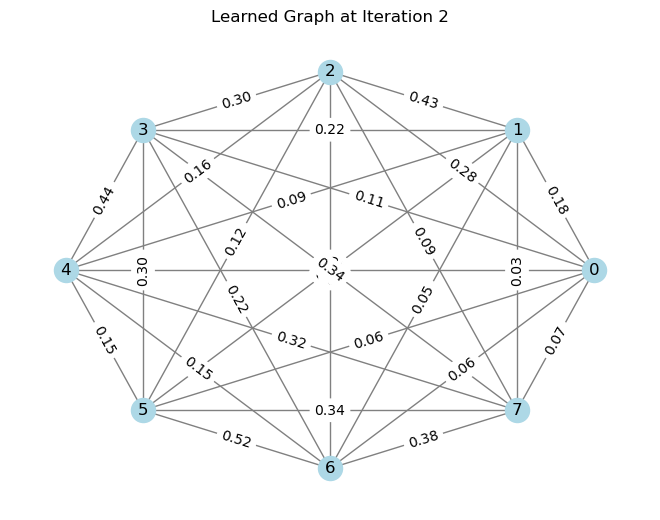

Iteration 3/5
after E-step: delta_W norm 0.0693, GLR 9.1165, adj norm^2 14.6538
after M-step-1: delta_W norm 0.0955, GLR 9.2403, adj norm^2 15.1539
PGD iter 1/50, ||S_new - S||_F = 0.1224
PGD iter 21/50, ||S_new - S||_F = 0.1144
PGD iter 41/50, ||S_new - S||_F = 0.0884
tensor([[0.0000, 0.5931, 0.5915, 0.3872, 0.0730, 0.3850, 0.2979, 0.1917],
        [0.5931, 0.0000, 0.5864, 0.1476, -0.0000, 0.0525, -0.0000, -0.0000],
        [0.5915, 0.5864, 0.0000, 0.3924, 0.0515, 0.3421, 0.1799, 0.0000],
        [0.3872, 0.1476, 0.3924, 0.0000, 0.6167, 0.5522, 0.3783, 0.3708],
        [0.0730, -0.0000, 0.0515, 0.6167, 0.0000, 0.6319, 0.5940, 0.5729],
        [0.3850, 0.0525, 0.3421, 0.5522, 0.6319, 0.0000, 0.6175, 0.5374],
        [0.2979, -0.0000, 0.1799, 0.3783, 0.5940, 0.6175, 0.0000, 0.6049],
        [0.1917, -0.0000, 0.0000, 0.3708, 0.5729, 0.5374, 0.6049, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 3 tensor(4.0342, grad_fn=<PowBackward0>)


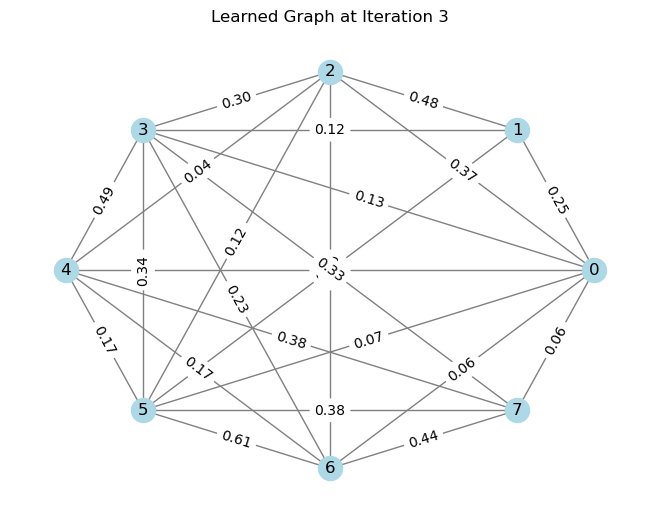

Iteration 4/5
after E-step: delta_W norm 0.0836, GLR 7.1418, adj norm^2 14.1635
after M-step-1: delta_W norm 0.1176, GLR 7.3584, adj norm^2 14.9317
PGD iter 1/50, ||S_new - S||_F = 0.1448
PGD iter 21/50, ||S_new - S||_F = 0.1347
PGD iter 41/50, ||S_new - S||_F = 0.0764
tensor([[0.0000, 0.5849, 0.5854, 0.3257, -0.0000, 0.3074, 0.2029, 0.0735],
        [0.5849, 0.0000, 0.5655, 0.0251, -0.0000, -0.0000, -0.0000, -0.0000],
        [0.5854, 0.5655, 0.0000, 0.3078, -0.0000, 0.2433, 0.0529, -0.0000],
        [0.3257, 0.0251, 0.3078, 0.0000, 0.5850, 0.5314, 0.3356, 0.3073],
        [-0.0000, -0.0000, -0.0000, 0.5850, 0.0000, 0.6296, 0.5876, 0.5535],
        [0.3074, -0.0000, 0.2433, 0.5314, 0.6296, 0.0000, 0.5965, 0.5058],
        [0.2029, -0.0000, 0.0529, 0.3356, 0.5876, 0.5965, 0.0000, 0.5888],
        [0.0735, -0.0000, -0.0000, 0.3073, 0.5535, 0.5058, 0.5888, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 4 tensor(4.4202, grad_fn=<PowBackward0>)


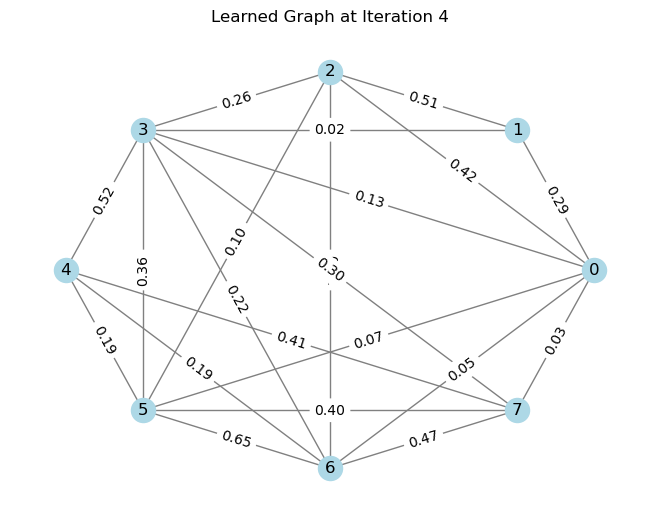

Iteration 5/5
after E-step: delta_W norm 0.1142, GLR 6.1291, adj norm^2 13.9606
after M-step-1: delta_W norm 0.0858, GLR 6.2396, adj norm^2 14.1970
PGD iter 1/50, ||S_new - S||_F = 0.1551
PGD iter 21/50, ||S_new - S||_F = 0.1438
PGD iter 41/50, ||S_new - S||_F = 0.0730
tensor([[0.0000, 0.5926, 0.5915, 0.3209, -0.0000, 0.2890, 0.1736, 0.0872],
        [0.5926, 0.0000, 0.5597, 0.0000, -0.0000, -0.0000, -0.0000, -0.0000],
        [0.5915, 0.5597, 0.0000, 0.2557, -0.0000, 0.1625, -0.0000, -0.0000],
        [0.3209, 0.0000, 0.2557, 0.0000, 0.5686, 0.5133, 0.2934, 0.2732],
        [-0.0000, -0.0000, -0.0000, 0.5686, 0.0000, 0.6266, 0.5769, 0.5403],
        [0.2890, -0.0000, 0.1625, 0.5133, 0.6266, 0.0000, 0.5790, 0.4790],
        [0.1736, -0.0000, -0.0000, 0.2934, 0.5769, 0.5790, 0.0000, 0.5703],
        [0.0872, -0.0000, -0.0000, 0.2732, 0.5403, 0.4790, 0.5703, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 5 tensor(4.6614, grad_fn=<PowBackward0>)


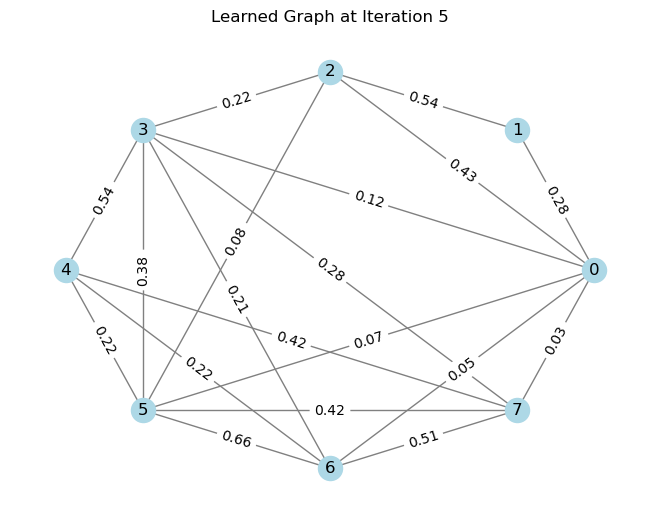

Final learned adjacency matrix:
tensor([[0.0000, 0.2796, 0.4268, 0.1243, -0.0000, 0.0711, 0.0459, 0.0279],
        [0.2796, 0.0000, 0.5365, 0.0000, -0.0000, -0.0000, -0.0000, -0.0000],
        [0.4268, 0.5365, 0.0000, 0.2228, -0.0000, 0.0766, -0.0000, -0.0000],
        [0.1243, 0.0000, 0.2228, 0.0000, 0.5429, 0.3820, 0.2124, 0.2769],
        [-0.0000, -0.0000, -0.0000, 0.5429, 0.0000, 0.2174, 0.2204, 0.4159],
        [0.0711, -0.0000, 0.0766, 0.3820, 0.2174, 0.0000, 0.6630, 0.4153],
        [0.0459, -0.0000, -0.0000, 0.2124, 0.2204, 0.6630, 0.0000, 0.5102],
        [0.0279, -0.0000, -0.0000, 0.2769, 0.4159, 0.4153, 0.5102, 0.0000]],
       grad_fn=<MulBackward0>) tensor(4.6614, grad_fn=<PowBackward0>)


In [3]:
arg_dict = {
    'mu': 0.2,
    'gamma': 0.4,
    'step_size': 0.02,
    'c': 5,
    'PGD_iters': 50,
    'use_block_coordinate': False,
    'PGD_step_size': 0.02
}
Experiment(arg_dict, num_nodes, S_init=None, seed=42)

Iteration 1/5
after E-step: delta_W norm 0.1767, GLR 10.9611, adj norm^2 15.3861
after M-step-1: delta_W norm 0.0439, GLR 10.8080, adj norm^2 15.3495
PGD iter 1/50, ||S_new - S||_F = 0.1434
PGD iter 21/50, ||S_new - S||_F = 0.1235
PGD iter 41/50, ||S_new - S||_F = 0.0809
tensor([[0.0000, 0.4557, 0.5415, 0.2591, 0.1519, 0.1883, 0.1484, 0.1219],
        [0.4557, 0.0000, 0.5599, 0.2689, 0.0992, 0.1091, 0.0149, 0.0000],
        [0.5415, 0.5599, 0.0000, 0.3707, 0.1924, 0.2072, 0.1124, 0.0609],
        [0.2591, 0.2689, 0.3707, 0.0000, 0.5321, 0.4267, 0.2833, 0.3625],
        [0.1519, 0.0992, 0.1924, 0.5321, 0.0000, 0.3629, 0.3467, 0.4730],
        [0.1883, 0.1091, 0.2072, 0.4267, 0.3629, 0.0000, 0.6019, 0.4452],
        [0.1484, 0.0149, 0.1124, 0.2833, 0.3467, 0.6019, 0.0000, 0.5121],
        [0.1219, 0.0000, 0.0609, 0.3625, 0.4730, 0.4452, 0.5121, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 1 tensor(0.7722, grad_fn=<PowBackward0>)


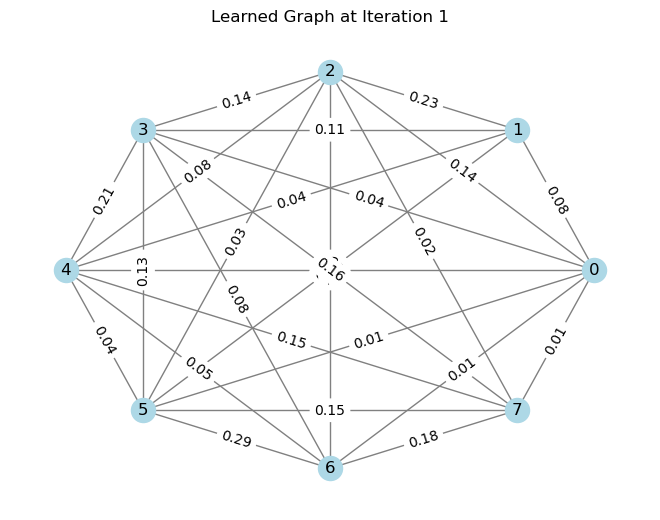

Iteration 2/5
after E-step: delta_W norm 0.0565, GLR 7.6930, adj norm^2 14.4104
after M-step-1: delta_W norm 0.1458, GLR 7.7358, adj norm^2 14.3190
PGD iter 1/50, ||S_new - S||_F = 0.2949
PGD iter 21/50, ||S_new - S||_F = 0.1617
PGD iter 41/50, ||S_new - S||_F = 0.0335
tensor([[0.0000, 0.4029, 0.4352, 0.0678, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.4029, 0.0000, 0.4756, 0.1070, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.4352, 0.4756, 0.0000, 0.3215, 0.0497, 0.0000, 0.0000, 0.0000],
        [0.0678, 0.1070, 0.3215, 0.0000, 0.4837, 0.3167, 0.0000, 0.1159],
        [0.0000, 0.0000, 0.0497, 0.4837, 0.0000, 0.3747, 0.2926, 0.3478],
        [0.0000, 0.0000, 0.0000, 0.3167, 0.3747, 0.0000, 0.4545, 0.2436],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.2926, 0.4545, 0.0000, 0.4114],
        [0.0000, 0.0000, 0.0000, 0.1159, 0.3478, 0.2436, 0.4114, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 2 tensor(2.8232, grad_fn=<PowBackward0>)


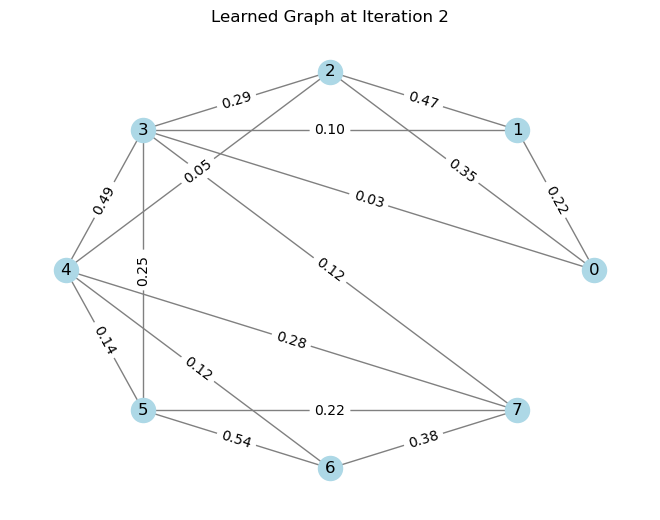

Iteration 3/5
after E-step: delta_W norm 0.1352, GLR 5.2340, adj norm^2 13.8353
after M-step-1: delta_W norm 0.1284, GLR 5.2778, adj norm^2 14.3702
PGD iter 1/50, ||S_new - S||_F = 0.4187
PGD iter 21/50, ||S_new - S||_F = 0.1202
PGD iter 41/50, ||S_new - S||_F = 0.0243
tensor([[0.0000, 0.3541, 0.3903, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3541, 0.0000, 0.3902, 0.0661, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3903, 0.3902, 0.0000, 0.3071, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0661, 0.3071, 0.0000, 0.4309, 0.2698, 0.0000, 0.0476],
        [0.0000, 0.0000, 0.0000, 0.4309, 0.0000, 0.3693, 0.2444, 0.2944],
        [0.0000, 0.0000, 0.0000, 0.2698, 0.3693, 0.0000, 0.3688, 0.1479],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.2444, 0.3688, 0.0000, 0.3634],
        [0.0000, 0.0000, 0.0000, 0.0476, 0.2944, 0.1479, 0.3634, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 3 tensor(3.6017, grad_fn=<PowBackward0>)


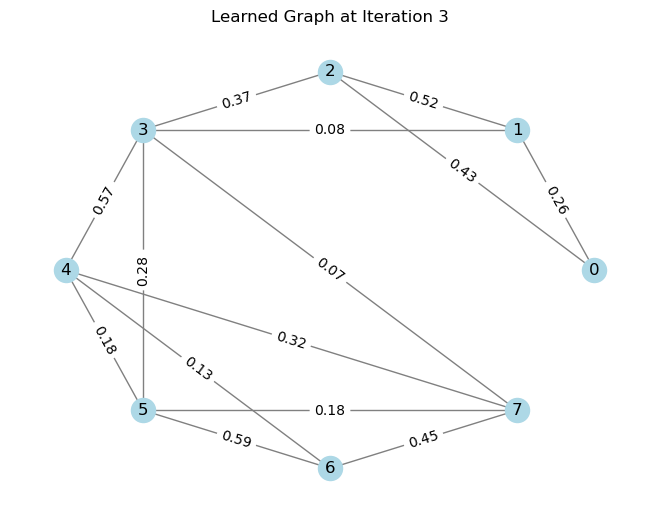

Iteration 4/5
after E-step: delta_W norm 0.1287, GLR 4.8962, adj norm^2 13.7222
after M-step-1: delta_W norm 0.1249, GLR 4.9263, adj norm^2 14.2546
PGD iter 1/50, ||S_new - S||_F = 0.4886
PGD iter 21/50, ||S_new - S||_F = 0.0991
PGD iter 41/50, ||S_new - S||_F = 0.0206
tensor([[0.0000, 0.3206, 0.3627, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3206, 0.0000, 0.3415, 0.0499, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3627, 0.3415, 0.0000, 0.2820, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0499, 0.2820, 0.0000, 0.3832, 0.2402, 0.0000, 0.0404],
        [0.0000, 0.0000, 0.0000, 0.3832, 0.0000, 0.3667, 0.2170, 0.2548],
        [0.0000, 0.0000, 0.0000, 0.2402, 0.3667, 0.0000, 0.3296, 0.0964],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.2170, 0.3296, 0.0000, 0.3407],
        [0.0000, 0.0000, 0.0000, 0.0404, 0.2548, 0.0964, 0.3407, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 4 tensor(4.0218, grad_fn=<PowBackward0>)


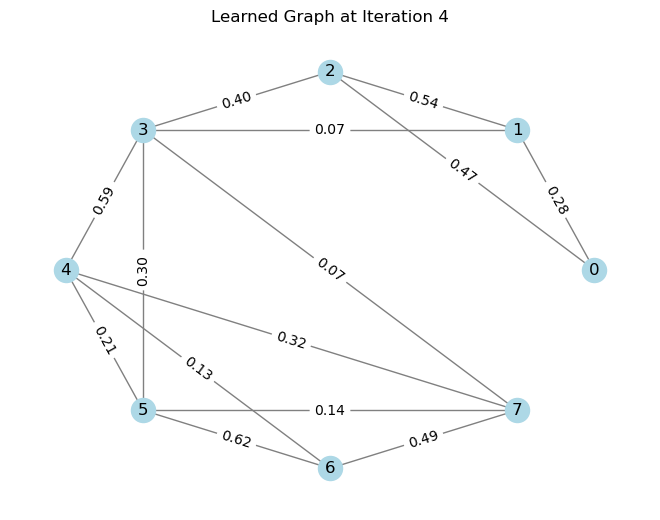

Iteration 5/5
after E-step: delta_W norm 0.1263, GLR 4.8528, adj norm^2 13.6957
after M-step-1: delta_W norm 0.1132, GLR 4.8768, adj norm^2 14.1820
PGD iter 1/50, ||S_new - S||_F = 0.5381
PGD iter 21/50, ||S_new - S||_F = 0.0858
PGD iter 41/50, ||S_new - S||_F = 0.0193
tensor([[0.0000, 0.3006, 0.3471, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3006, 0.0000, 0.3133, 0.0405, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3471, 0.3133, 0.0000, 0.2642, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0405, 0.2642, 0.0000, 0.3543, 0.2186, 0.0000, 0.0393],
        [0.0000, 0.0000, 0.0000, 0.3543, 0.0000, 0.3657, 0.1956, 0.2306],
        [0.0000, 0.0000, 0.0000, 0.2186, 0.3657, 0.0000, 0.3084, 0.0707],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.1956, 0.3084, 0.0000, 0.3277],
        [0.0000, 0.0000, 0.0000, 0.0393, 0.2306, 0.0707, 0.3277, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 5 tensor(4.3541, grad_fn=<PowBackward0>)


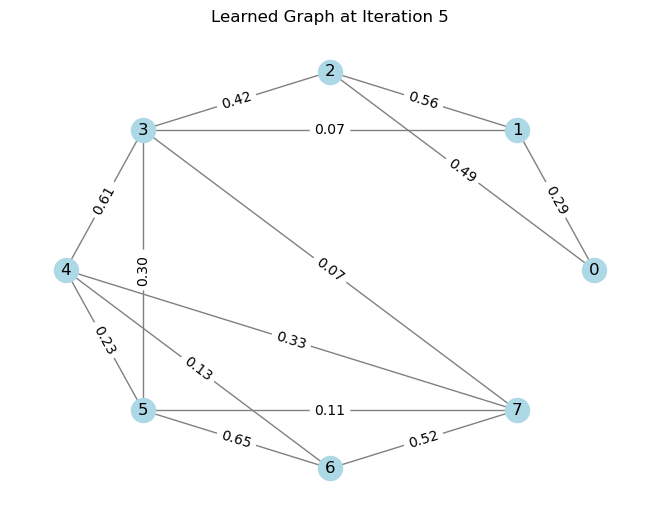

Final learned adjacency matrix:
tensor([[0.0000, 0.2852, 0.4914, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2852, 0.0000, 0.5598, 0.0668, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.4914, 0.5598, 0.0000, 0.4224, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0668, 0.4224, 0.0000, 0.6149, 0.3015, 0.0000, 0.0713],
        [0.0000, 0.0000, 0.0000, 0.6149, 0.0000, 0.2309, 0.1319, 0.3281],
        [0.0000, 0.0000, 0.0000, 0.3015, 0.2309, 0.0000, 0.6481, 0.1101],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.1319, 0.6481, 0.0000, 0.5228],
        [0.0000, 0.0000, 0.0000, 0.0713, 0.3281, 0.1101, 0.5228, 0.0000]],
       grad_fn=<MulBackward0>) tensor(4.3541, grad_fn=<PowBackward0>)


In [4]:
arg_dict = {
    'mu': 0.2,
    'gamma': 0.4,
    'step_size': 0.02,
    'c': 5,
    'PGD_iters': 50,
    'use_block_coordinate': False,
    'PGD_step_size': 0.04
}
Experiment(arg_dict, num_nodes, S_init=None, seed=42)

Iteration 1/5
after E-step: delta_W norm 0.1767, GLR 10.9611, adj norm^2 15.3861
after M-step-1: delta_W norm 0.0439, GLR 10.8080, adj norm^2 15.3495
PGD iter 1/50, ||S_new - S||_F = 0.0359
PGD iter 21/50, ||S_new - S||_F = 0.0349
PGD iter 41/50, ||S_new - S||_F = 0.0338
tensor([[0.0000, 0.8222, 0.8343, 0.7823, 0.7297, 0.7774, 0.7643, 0.7474],
        [0.8222, 0.0000, 0.8265, 0.7410, 0.6927, 0.7206, 0.6920, 0.6593],
        [0.8343, 0.8265, 0.0000, 0.7899, 0.7206, 0.7724, 0.7424, 0.7056],
        [0.7823, 0.7410, 0.7899, 0.0000, 0.8349, 0.8173, 0.7769, 0.7824],
        [0.7297, 0.6927, 0.7206, 0.8349, 0.0000, 0.8198, 0.8122, 0.8188],
        [0.7774, 0.7206, 0.7724, 0.8173, 0.8198, 0.0000, 0.8485, 0.8158],
        [0.7643, 0.6920, 0.7424, 0.7769, 0.8122, 0.8485, 0.0000, 0.8306],
        [0.7474, 0.6593, 0.7056, 0.7824, 0.8188, 0.8158, 0.8306, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 1 tensor(3.0453, grad_fn=<PowBackward0>)


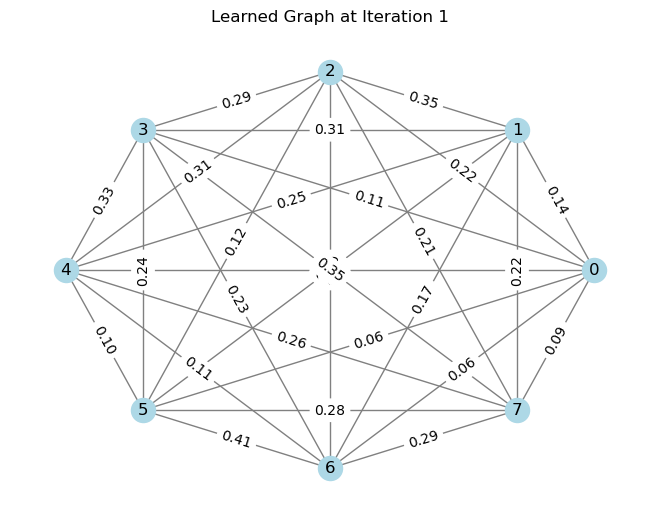

Iteration 2/5
after E-step: delta_W norm 0.0466, GLR 10.8699, adj norm^2 15.3305
after M-step-1: delta_W norm 0.0729, GLR 10.7005, adj norm^2 15.0242
PGD iter 1/50, ||S_new - S||_F = 0.0409
PGD iter 21/50, ||S_new - S||_F = 0.0398
PGD iter 41/50, ||S_new - S||_F = 0.0385
tensor([[0.0000, 0.8117, 0.8195, 0.7642, 0.6935, 0.7568, 0.7397, 0.7246],
        [0.8117, 0.0000, 0.8095, 0.7005, 0.6436, 0.6643, 0.6299, 0.5997],
        [0.8195, 0.8095, 0.0000, 0.7599, 0.6684, 0.7367, 0.6945, 0.6553],
        [0.7642, 0.7005, 0.7599, 0.0000, 0.8221, 0.7969, 0.7459, 0.7542],
        [0.6935, 0.6436, 0.6684, 0.8221, 0.0000, 0.8152, 0.8028, 0.8030],
        [0.7568, 0.6643, 0.7367, 0.7969, 0.8152, 0.0000, 0.8265, 0.7944],
        [0.7397, 0.6299, 0.6945, 0.7459, 0.8028, 0.8265, 0.0000, 0.8141],
        [0.7246, 0.5997, 0.6553, 0.7542, 0.8030, 0.7944, 0.8141, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 2 tensor(4.6271, grad_fn=<PowBackward0>)


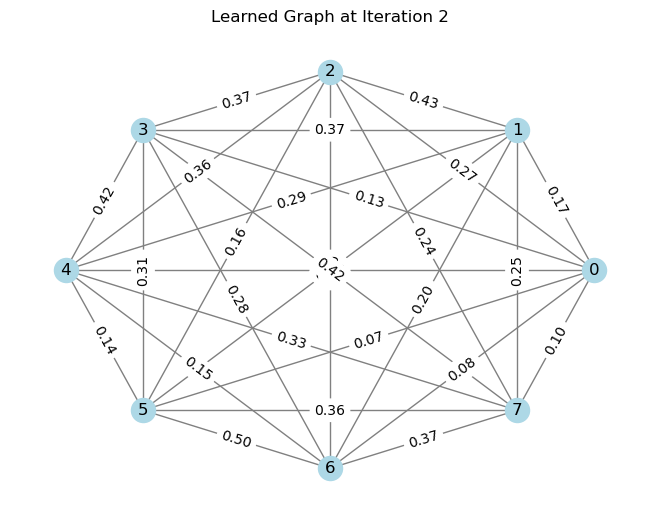

Iteration 3/5
after E-step: delta_W norm 0.0725, GLR 10.8062, adj norm^2 15.2857
after M-step-1: delta_W norm 0.0611, GLR 10.8105, adj norm^2 15.2321
PGD iter 1/50, ||S_new - S||_F = 0.0422
PGD iter 21/50, ||S_new - S||_F = 0.0411
PGD iter 41/50, ||S_new - S||_F = 0.0397
tensor([[0.0000, 0.8042, 0.8086, 0.7476, 0.6617, 0.7451, 0.7235, 0.6979],
        [0.8042, 0.0000, 0.8053, 0.6900, 0.6293, 0.6604, 0.6226, 0.5833],
        [0.8086, 0.8053, 0.0000, 0.7565, 0.6605, 0.7380, 0.6939, 0.6461],
        [0.7476, 0.6900, 0.7565, 0.0000, 0.8195, 0.7964, 0.7430, 0.7475],
        [0.6617, 0.6293, 0.6605, 0.8195, 0.0000, 0.8147, 0.8025, 0.8005],
        [0.7451, 0.6604, 0.7380, 0.7964, 0.8147, 0.0000, 0.8251, 0.7930],
        [0.7235, 0.6226, 0.6939, 0.7430, 0.8025, 0.8251, 0.0000, 0.8130],
        [0.6979, 0.5833, 0.6461, 0.7475, 0.8005, 0.7930, 0.8130, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 3 tensor(4.9207, grad_fn=<PowBackward0>)


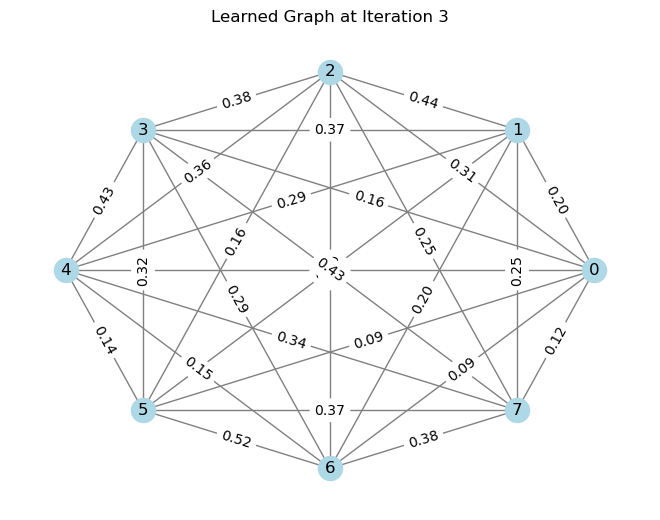

Iteration 4/5
after E-step: delta_W norm 0.0586, GLR 10.7198, adj norm^2 15.2795
after M-step-1: delta_W norm 0.0323, GLR 10.6688, adj norm^2 15.3440
PGD iter 1/50, ||S_new - S||_F = 0.0423
PGD iter 21/50, ||S_new - S||_F = 0.0412
PGD iter 41/50, ||S_new - S||_F = 0.0398
tensor([[0.0000, 0.8077, 0.8146, 0.7544, 0.6724, 0.7499, 0.7301, 0.7063],
        [0.8077, 0.0000, 0.8042, 0.6854, 0.6208, 0.6570, 0.6191, 0.5751],
        [0.8146, 0.8042, 0.0000, 0.7542, 0.6539, 0.7373, 0.6933, 0.6396],
        [0.7544, 0.6854, 0.7542, 0.0000, 0.8183, 0.7959, 0.7424, 0.7456],
        [0.6724, 0.6208, 0.6539, 0.8183, 0.0000, 0.8144, 0.8021, 0.7993],
        [0.7499, 0.6570, 0.7373, 0.7959, 0.8144, 0.0000, 0.8250, 0.7928],
        [0.7301, 0.6191, 0.6933, 0.7424, 0.8021, 0.8250, 0.0000, 0.8126],
        [0.7063, 0.5751, 0.6396, 0.7456, 0.7993, 0.7928, 0.8126, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 4 tensor(4.9775, grad_fn=<PowBackward0>)


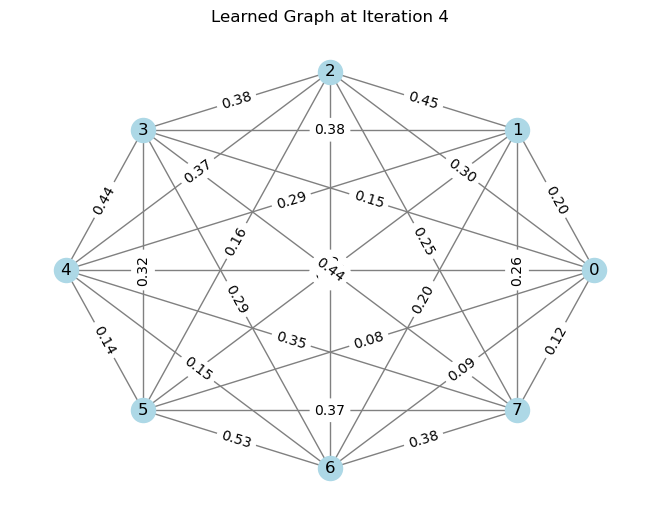

Iteration 5/5
after E-step: delta_W norm 0.0326, GLR 10.7386, adj norm^2 15.2812
after M-step-1: delta_W norm 0.1579, GLR 10.3226, adj norm^2 14.9370
PGD iter 1/50, ||S_new - S||_F = 0.0418
PGD iter 21/50, ||S_new - S||_F = 0.0407
PGD iter 41/50, ||S_new - S||_F = 0.0393
tensor([[0.0000, 0.8153, 0.8260, 0.7737, 0.7059, 0.7669, 0.7513, 0.7385],
        [0.8153, 0.0000, 0.8054, 0.6860, 0.6229, 0.6498, 0.6102, 0.5775],
        [0.8260, 0.8054, 0.0000, 0.7544, 0.6520, 0.7324, 0.6859, 0.6442],
        [0.7737, 0.6860, 0.7544, 0.0000, 0.8189, 0.7934, 0.7373, 0.7456],
        [0.7059, 0.6229, 0.6520, 0.8189, 0.0000, 0.8146, 0.8014, 0.8001],
        [0.7669, 0.6498, 0.7324, 0.7934, 0.8146, 0.0000, 0.8221, 0.7894],
        [0.7513, 0.6102, 0.6859, 0.7373, 0.8014, 0.8221, 0.0000, 0.8105],
        [0.7385, 0.5775, 0.6442, 0.7456, 0.8001, 0.7894, 0.8105, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 5 tensor(4.9994, grad_fn=<PowBackward0>)


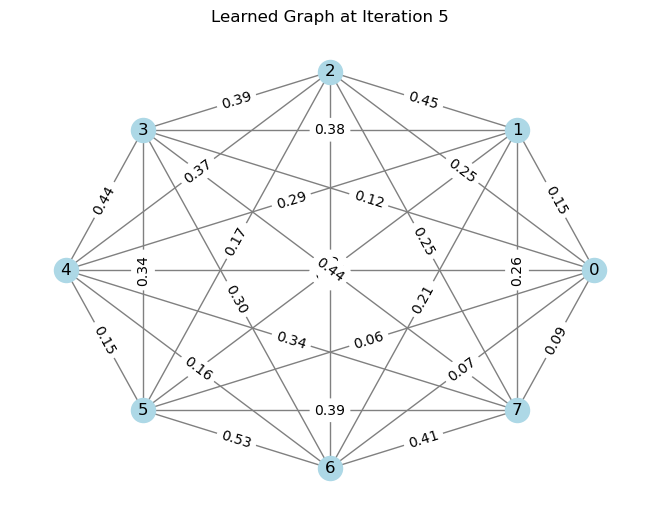

Final learned adjacency matrix:
tensor([[0.0000, 0.1492, 0.2454, 0.1155, 0.1754, 0.0622, 0.0665, 0.0887],
        [0.1492, 0.0000, 0.4483, 0.3810, 0.2921, 0.2213, 0.2053, 0.2572],
        [0.2454, 0.4483, 0.0000, 0.3869, 0.3730, 0.1711, 0.1732, 0.2488],
        [0.1155, 0.3810, 0.3869, 0.0000, 0.4391, 0.3356, 0.3031, 0.4419],
        [0.1754, 0.2921, 0.3730, 0.4391, 0.0000, 0.1513, 0.1613, 0.3407],
        [0.0622, 0.2213, 0.1711, 0.3356, 0.1513, 0.0000, 0.5329, 0.3898],
        [0.0665, 0.2053, 0.1732, 0.3031, 0.1613, 0.5329, 0.0000, 0.4060],
        [0.0887, 0.2572, 0.2488, 0.4419, 0.3407, 0.3898, 0.4060, 0.0000]],
       grad_fn=<MulBackward0>) tensor(4.9994, grad_fn=<PowBackward0>)


In [5]:
arg_dict = {
    'mu': 0.2,
    'gamma': 0.4,
    'step_size': 0.02,
    'c': 5,
    'PGD_iters': 50,
    'use_block_coordinate': False,
    'PGD_step_size': 0.01
}
Experiment(arg_dict, num_nodes, S_init=None, seed=42)

Iteration 1/5
after E-step: delta_W norm 0.1767, GLR 10.9611, adj norm^2 15.3861
after M-step-1: delta_W norm 0.0439, GLR 10.8080, adj norm^2 15.3495
PGD iter 1/100, ||S_new - S||_F = 0.0717
PGD iter 21/100, ||S_new - S||_F = 0.0676
PGD iter 41/100, ||S_new - S||_F = 0.0618
PGD iter 61/100, ||S_new - S||_F = 0.0532
PGD iter 81/100, ||S_new - S||_F = 0.0407
tensor([[0.0000, 0.4571, 0.5433, 0.2604, 0.1540, 0.1892, 0.1494, 0.1233],
        [0.4571, 0.0000, 0.5614, 0.2709, 0.1013, 0.1110, 0.0170, 0.0000],
        [0.5433, 0.5614, 0.0000, 0.3724, 0.1946, 0.2083, 0.1139, 0.0629],
        [0.2604, 0.2709, 0.3724, 0.0000, 0.5335, 0.4281, 0.2849, 0.3643],
        [0.1540, 0.1013, 0.1946, 0.5335, 0.0000, 0.3637, 0.3476, 0.4746],
        [0.1892, 0.1110, 0.2083, 0.4281, 0.3637, 0.0000, 0.6035, 0.4467],
        [0.1494, 0.0170, 0.1139, 0.2849, 0.3476, 0.6035, 0.0000, 0.5137],
        [0.1233, 0.0000, 0.0629, 0.3643, 0.4746, 0.4467, 0.5137, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iterati

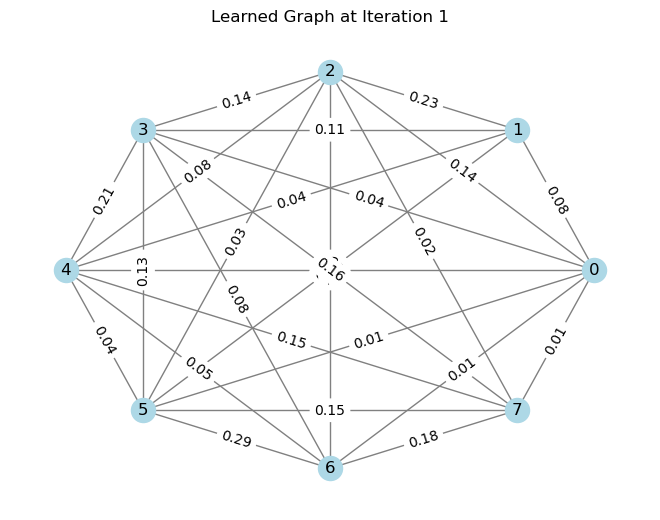

Iteration 2/5
after E-step: delta_W norm 0.0564, GLR 7.7148, adj norm^2 14.4161
after M-step-1: delta_W norm 0.1451, GLR 7.7552, adj norm^2 14.3198
PGD iter 1/100, ||S_new - S||_F = 0.1469
PGD iter 21/100, ||S_new - S||_F = 0.1367
PGD iter 41/100, ||S_new - S||_F = 0.0824
PGD iter 61/100, ||S_new - S||_F = 0.0348
PGD iter 81/100, ||S_new - S||_F = 0.0172
tensor([[0.0000, 0.4049, 0.4376, 0.0698, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.4049, 0.0000, 0.4778, 0.1070, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.4376, 0.4778, 0.0000, 0.3221, 0.0491, 0.0000, 0.0000, 0.0000],
        [0.0698, 0.1070, 0.3221, 0.0000, 0.4859, 0.3179, 0.0000, 0.1169],
        [0.0000, 0.0000, 0.0491, 0.4859, 0.0000, 0.3758, 0.2943, 0.3499],
        [0.0000, 0.0000, 0.0000, 0.3179, 0.3758, 0.0000, 0.4566, 0.2459],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.2943, 0.4566, 0.0000, 0.4134],
        [0.0000, 0.0000, 0.0000, 0.1169, 0.3499, 0.2459, 0.4134, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration

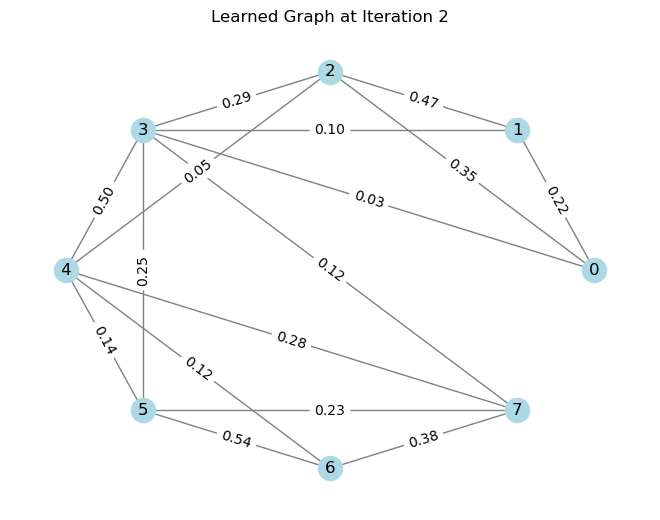

Iteration 3/5
after E-step: delta_W norm 0.1343, GLR 5.2325, adj norm^2 13.8351
after M-step-1: delta_W norm 0.1281, GLR 5.2767, adj norm^2 14.3700
PGD iter 1/100, ||S_new - S||_F = 0.2086
PGD iter 21/100, ||S_new - S||_F = 0.1882
PGD iter 41/100, ||S_new - S||_F = 0.0620
PGD iter 61/100, ||S_new - S||_F = 0.0209
PGD iter 81/100, ||S_new - S||_F = 0.0124
tensor([[0.0000, 0.3564, 0.3920, 0.0020, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3564, 0.0000, 0.3933, 0.0655, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3920, 0.3933, 0.0000, 0.3075, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0020, 0.0655, 0.3075, 0.0000, 0.4331, 0.2719, 0.0000, 0.0461],
        [0.0000, 0.0000, 0.0000, 0.4331, 0.0000, 0.3704, 0.2466, 0.2973],
        [0.0000, 0.0000, 0.0000, 0.2719, 0.3704, 0.0000, 0.3708, 0.1503],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.2466, 0.3708, 0.0000, 0.3654],
        [0.0000, 0.0000, 0.0000, 0.0461, 0.2973, 0.1503, 0.3654, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration

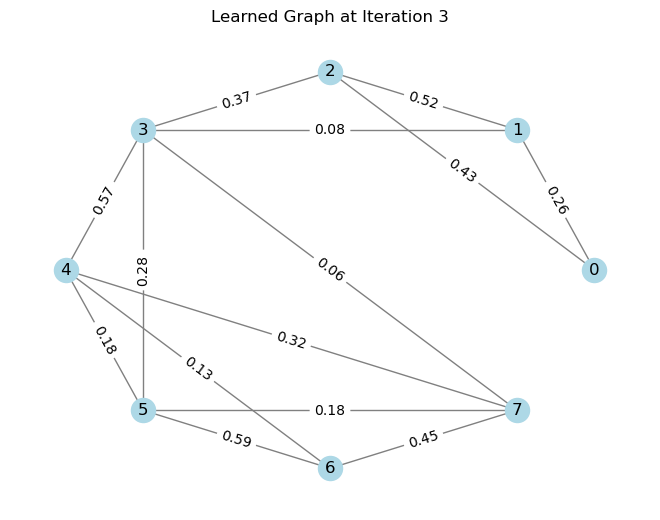

Iteration 4/5
after E-step: delta_W norm 0.1283, GLR 4.8923, adj norm^2 13.7211
after M-step-1: delta_W norm 0.1179, GLR 4.9223, adj norm^2 14.1992
PGD iter 1/100, ||S_new - S||_F = 0.2430
PGD iter 21/100, ||S_new - S||_F = 0.1814
PGD iter 41/100, ||S_new - S||_F = 0.0507
PGD iter 61/100, ||S_new - S||_F = 0.0200
PGD iter 81/100, ||S_new - S||_F = 0.0109
tensor([[0.0000, 0.3248, 0.3661, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3248, 0.0000, 0.3446, 0.0498, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3661, 0.3446, 0.0000, 0.2828, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0498, 0.2828, 0.0000, 0.3854, 0.2421, 0.0000, 0.0387],
        [0.0000, 0.0000, 0.0000, 0.3854, 0.0000, 0.3678, 0.2192, 0.2575],
        [0.0000, 0.0000, 0.0000, 0.2421, 0.3678, 0.0000, 0.3309, 0.0978],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.2192, 0.3309, 0.0000, 0.3421],
        [0.0000, 0.0000, 0.0000, 0.0387, 0.2575, 0.0978, 0.3421, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration

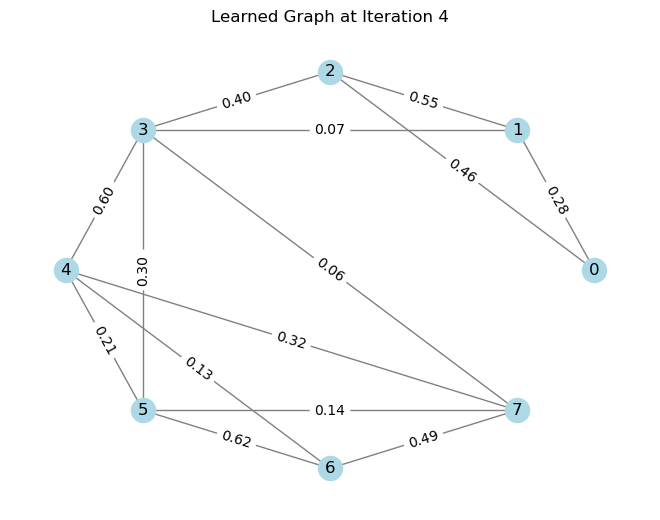

Iteration 5/5
after E-step: delta_W norm 0.1197, GLR 4.8489, adj norm^2 13.6946
after M-step-1: delta_W norm 0.1091, GLR 4.8726, adj norm^2 14.1644
PGD iter 1/100, ||S_new - S||_F = 0.2676
PGD iter 21/100, ||S_new - S||_F = 0.1686
PGD iter 41/100, ||S_new - S||_F = 0.0436
PGD iter 61/100, ||S_new - S||_F = 0.0183
PGD iter 81/100, ||S_new - S||_F = 0.0099
tensor([[0.0000, 0.3039, 0.3493, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3039, 0.0000, 0.3161, 0.0405, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3493, 0.3161, 0.0000, 0.2653, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0405, 0.2653, 0.0000, 0.3568, 0.2207, 0.0000, 0.0379],
        [0.0000, 0.0000, 0.0000, 0.3568, 0.0000, 0.3668, 0.1983, 0.2331],
        [0.0000, 0.0000, 0.0000, 0.2207, 0.3668, 0.0000, 0.3096, 0.0716],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.1983, 0.3096, 0.0000, 0.3293],
        [0.0000, 0.0000, 0.0000, 0.0379, 0.2331, 0.0716, 0.3293, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration

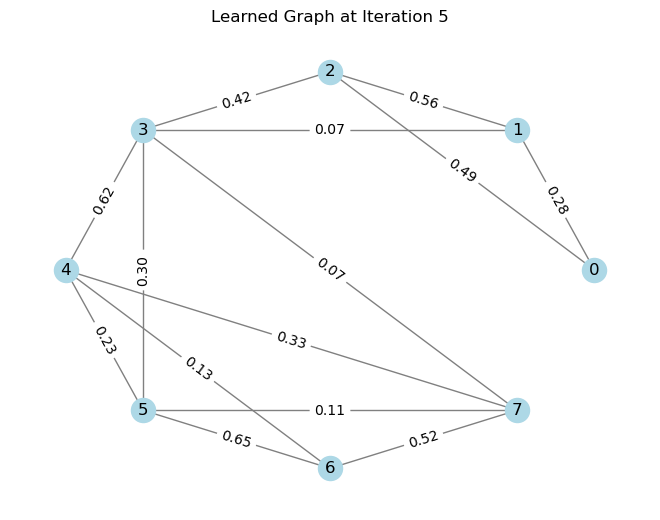

Final learned adjacency matrix:
tensor([[0.0000, 0.2849, 0.4889, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2849, 0.0000, 0.5618, 0.0663, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.4889, 0.5618, 0.0000, 0.4219, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0663, 0.4219, 0.0000, 0.6155, 0.3027, 0.0000, 0.0683],
        [0.0000, 0.0000, 0.0000, 0.6155, 0.0000, 0.2303, 0.1332, 0.3296],
        [0.0000, 0.0000, 0.0000, 0.3027, 0.2303, 0.0000, 0.6470, 0.1109],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.1332, 0.6470, 0.0000, 0.5228],
        [0.0000, 0.0000, 0.0000, 0.0683, 0.3296, 0.1109, 0.5228, 0.0000]],
       grad_fn=<MulBackward0>) tensor(4.3538, grad_fn=<PowBackward0>)


In [6]:
arg_dict = {
    'mu': 0.2,
    'gamma': 0.4,
    'step_size': 0.02,
    'c': 5,
    'PGD_iters': 100,
    'use_block_coordinate': False,
    'PGD_step_size': 0.02
}
Experiment(arg_dict, num_nodes, S_init=None, seed=42)

Iteration 1/5
after E-step: delta_W norm 0.1767, GLR 10.9611, adj norm^2 15.3861
after M-step-1: delta_W norm 0.0439, GLR 10.8080, adj norm^2 15.3495
PGD iter 1/100, ||S_new - S||_F = 0.1434
PGD iter 21/100, ||S_new - S||_F = 0.1235
PGD iter 41/100, ||S_new - S||_F = 0.0809
PGD iter 61/100, ||S_new - S||_F = 0.0335
PGD iter 81/100, ||S_new - S||_F = 0.0157
tensor([[0.0000, 0.3642, 0.6081, 0.0070, 0.1360, 0.0000, 0.0000, 0.0000],
        [0.3642, 0.0000, 0.5789, 0.2953, 0.0643, 0.0745, 0.0096, 0.0634],
        [0.6081, 0.5789, 0.0000, 0.3455, 0.2444, 0.0000, 0.0000, 0.0000],
        [0.0070, 0.2953, 0.3455, 0.0000, 0.4924, 0.3711, 0.1651, 0.3231],
        [0.1360, 0.0643, 0.2444, 0.4924, 0.0000, 0.0106, 0.0324, 0.4599],
        [0.0000, 0.0745, 0.0000, 0.3711, 0.0106, 0.0000, 0.6365, 0.3561],
        [0.0000, 0.0096, 0.0000, 0.1651, 0.0324, 0.6365, 0.0000, 0.4966],
        [0.0000, 0.0634, 0.0000, 0.3231, 0.4599, 0.3561, 0.4966, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iterati

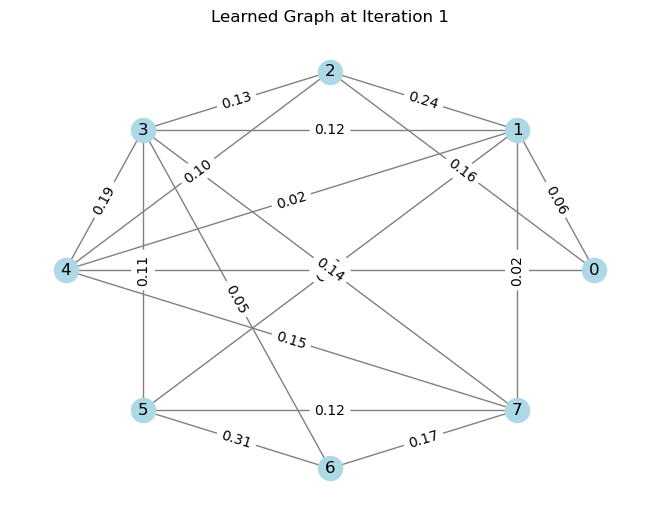

Iteration 2/5
after E-step: delta_W norm 0.0534, GLR 6.5019, adj norm^2 14.2849
after M-step-1: delta_W norm 0.1972, GLR 6.4662, adj norm^2 14.4800
PGD iter 1/100, ||S_new - S||_F = 0.3145
PGD iter 21/100, ||S_new - S||_F = 0.1459
PGD iter 41/100, ||S_new - S||_F = 0.0261
PGD iter 61/100, ||S_new - S||_F = 0.0117
PGD iter 81/100, ||S_new - S||_F = 0.0071
tensor([[0.0000, 0.3117, 0.4490, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3117, 0.0000, 0.4273, 0.1417, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.4490, 0.4273, 0.0000, 0.3032, 0.0568, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.1417, 0.3032, 0.0000, 0.4585, 0.3152, 0.0000, 0.1391],
        [0.0000, 0.0000, 0.0568, 0.4585, 0.0000, 0.1646, 0.0503, 0.3359],
        [0.0000, 0.0000, 0.0000, 0.3152, 0.1646, 0.0000, 0.4711, 0.1633],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0503, 0.4711, 0.0000, 0.4154],
        [0.0000, 0.0000, 0.0000, 0.1391, 0.3359, 0.1633, 0.4154, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration

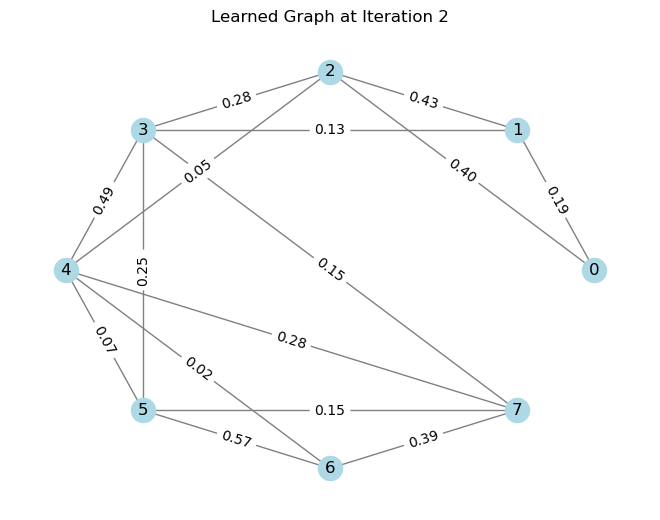

Iteration 3/5
after E-step: delta_W norm 0.1791, GLR 5.1557, adj norm^2 13.8304
after M-step-1: delta_W norm 0.1559, GLR 5.1697, adj norm^2 14.4560
PGD iter 1/100, ||S_new - S||_F = 0.4330
PGD iter 21/100, ||S_new - S||_F = 0.1116
PGD iter 41/100, ||S_new - S||_F = 0.0235
PGD iter 61/100, ||S_new - S||_F = 0.0106
PGD iter 81/100, ||S_new - S||_F = 0.0063
tensor([[0.0000, 0.2779, 0.4068, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2779, 0.0000, 0.3564, 0.0749, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.4068, 0.3564, 0.0000, 0.2955, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0749, 0.2955, 0.0000, 0.4161, 0.2904, 0.0000, 0.0630],
        [0.0000, 0.0000, 0.0000, 0.4161, 0.0000, 0.1850, 0.0049, 0.3142],
        [0.0000, 0.0000, 0.0000, 0.2904, 0.1850, 0.0000, 0.3957, 0.0968],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0049, 0.3957, 0.0000, 0.3842],
        [0.0000, 0.0000, 0.0000, 0.0630, 0.3142, 0.0968, 0.3842, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration

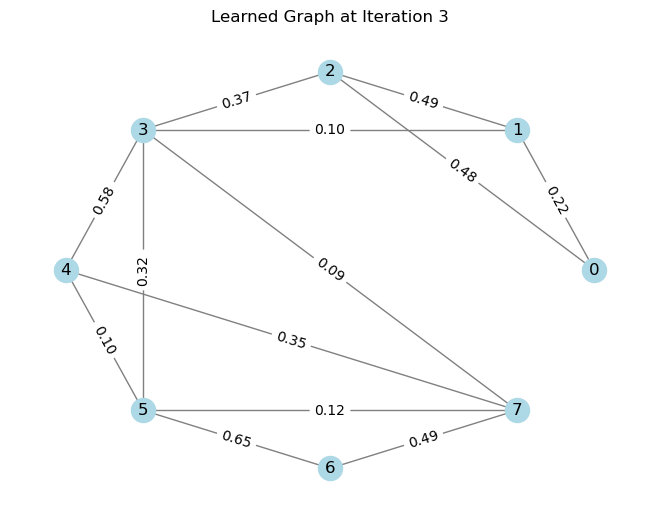

Iteration 4/5
after E-step: delta_W norm 0.1530, GLR 4.7777, adj norm^2 13.6983
after M-step-1: delta_W norm 0.1320, GLR 4.7999, adj norm^2 14.2089
PGD iter 1/100, ||S_new - S||_F = 0.4931
PGD iter 21/100, ||S_new - S||_F = 0.0956
PGD iter 41/100, ||S_new - S||_F = 0.0204
PGD iter 61/100, ||S_new - S||_F = 0.0099
PGD iter 81/100, ||S_new - S||_F = 0.0059
tensor([[0.0000, 0.2590, 0.3860, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2590, 0.0000, 0.3275, 0.0554, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3860, 0.3275, 0.0000, 0.2723, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0554, 0.2723, 0.0000, 0.3783, 0.2768, 0.0000, 0.0369],
        [0.0000, 0.0000, 0.0000, 0.3783, 0.0000, 0.1972, 0.0000, 0.3017],
        [0.0000, 0.0000, 0.0000, 0.2768, 0.1972, 0.0000, 0.3637, 0.0672],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.3637, 0.0000, 0.3698],
        [0.0000, 0.0000, 0.0000, 0.0369, 0.3017, 0.0672, 0.3698, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration

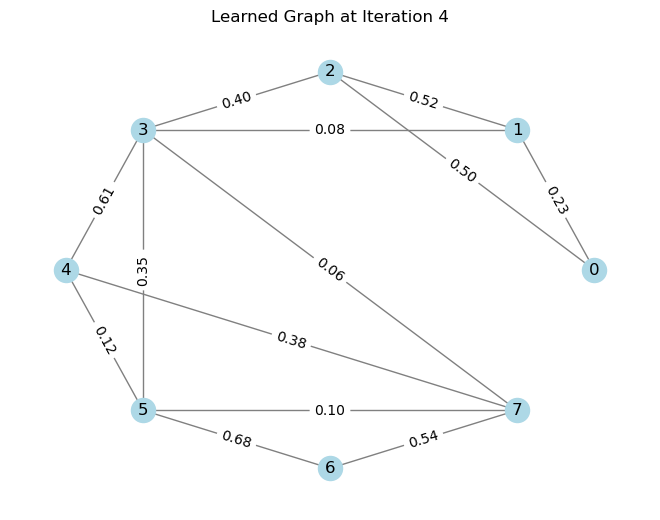

Iteration 5/5
after E-step: delta_W norm 0.1326, GLR 4.6848, adj norm^2 13.6590
after M-step-1: delta_W norm 0.1249, GLR 4.7153, adj norm^2 14.0806
PGD iter 1/100, ||S_new - S||_F = 0.5285
PGD iter 21/100, ||S_new - S||_F = 0.0859
PGD iter 41/100, ||S_new - S||_F = 0.0195
PGD iter 61/100, ||S_new - S||_F = 0.0099
PGD iter 81/100, ||S_new - S||_F = 0.0059
tensor([[0.0000, 0.2486, 0.3720, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2486, 0.0000, 0.3139, 0.0465, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3720, 0.3139, 0.0000, 0.2594, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0465, 0.2594, 0.0000, 0.3590, 0.2645, 0.0000, 0.0257],
        [0.0000, 0.0000, 0.0000, 0.3590, 0.0000, 0.2084, 0.0000, 0.2926],
        [0.0000, 0.0000, 0.0000, 0.2645, 0.2084, 0.0000, 0.3470, 0.0538],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.3470, 0.0000, 0.3638],
        [0.0000, 0.0000, 0.0000, 0.0257, 0.2926, 0.0538, 0.3638, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration

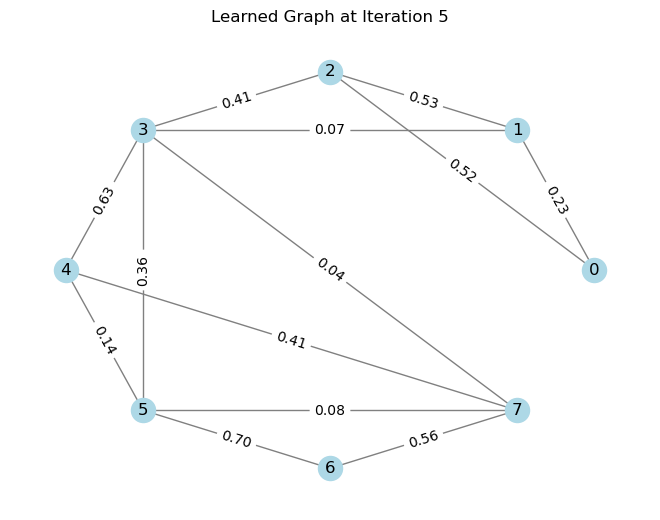

Final learned adjacency matrix:
tensor([[0.0000, 0.2323, 0.5160, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2323, 0.0000, 0.5347, 0.0739, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5160, 0.5347, 0.0000, 0.4092, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0739, 0.4092, 0.0000, 0.6254, 0.3571, 0.0000, 0.0450],
        [0.0000, 0.0000, 0.0000, 0.6254, 0.0000, 0.1431, 0.0000, 0.4053],
        [0.0000, 0.0000, 0.0000, 0.3571, 0.1431, 0.0000, 0.7028, 0.0839],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.7028, 0.0000, 0.5621],
        [0.0000, 0.0000, 0.0000, 0.0450, 0.4053, 0.0839, 0.5621, 0.0000]],
       grad_fn=<MulBackward0>) tensor(4.6029, grad_fn=<PowBackward0>)


In [7]:
arg_dict = {
    'mu': 0.2,
    'gamma': 0.4,
    'step_size': 0.02,
    'c': 5,
    'PGD_iters': 100,
    'use_block_coordinate': False,
    'PGD_step_size': 0.04
}
Experiment(arg_dict, num_nodes, S_init=None, seed=42)

Iteration 1/5
after E-step: delta_W norm 0.1767, GLR 10.9611, adj norm^2 15.3861
after M-step-1: delta_W norm 0.0439, GLR 10.8080, adj norm^2 15.3495
PGD iter 1/50, ||S_new - S||_F = 0.1308
PGD iter 21/50, ||S_new - S||_F = 0.1215
PGD iter 41/50, ||S_new - S||_F = 0.0991
tensor([[0.0000, 0.3321, 0.3851, 0.2339, 0.1751, 0.1959, 0.1747, 0.1594],
        [0.3321, 0.0000, 0.3861, 0.2219, 0.1283, 0.1425, 0.0901, 0.0584],
        [0.3851, 0.3861, 0.0000, 0.2909, 0.1893, 0.2045, 0.1539, 0.1198],
        [0.2339, 0.2219, 0.2909, 0.0000, 0.3808, 0.3268, 0.2503, 0.2894],
        [0.1751, 0.1283, 0.1893, 0.3808, 0.0000, 0.2868, 0.2776, 0.3440],
        [0.1959, 0.1425, 0.2045, 0.3268, 0.2868, 0.0000, 0.4311, 0.3378],
        [0.1747, 0.0901, 0.1539, 0.2503, 0.2776, 0.4311, 0.0000, 0.3702],
        [0.1594, 0.0584, 0.1198, 0.2894, 0.3440, 0.3378, 0.3702, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 1 tensor(0.4381, grad_fn=<PowBackward0>)


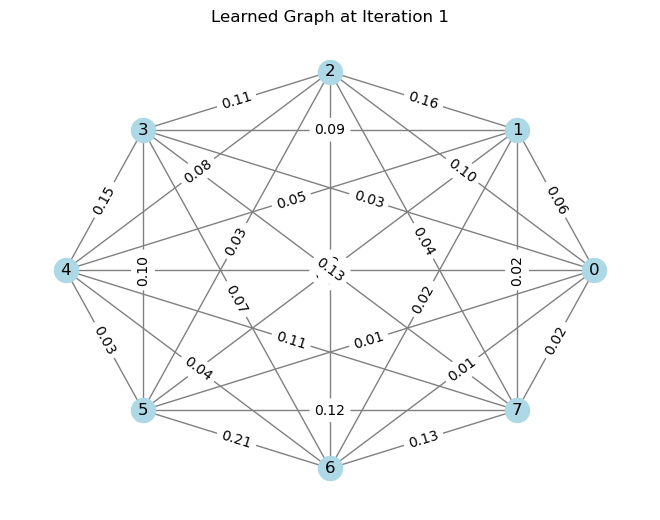

Iteration 2/5
after E-step: delta_W norm 0.0540, GLR 8.9976, adj norm^2 14.7394
after M-step-1: delta_W norm 0.0955, GLR 8.9177, adj norm^2 14.4419
PGD iter 1/50, ||S_new - S||_F = 0.2276
PGD iter 21/50, ||S_new - S||_F = 0.2010
PGD iter 41/50, ||S_new - S||_F = 0.0567
tensor([[0.0000, 0.2833, 0.2857, 0.0572, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2833, 0.0000, 0.3184, 0.0634, 0.0120, 0.0000, 0.0000, 0.0069],
        [0.2857, 0.3184, 0.0000, 0.2023, 0.0361, 0.0000, 0.0000, 0.0000],
        [0.0572, 0.0634, 0.2023, 0.0000, 0.3199, 0.2046, 0.0000, 0.0661],
        [0.0000, 0.0120, 0.0361, 0.3199, 0.0000, 0.2760, 0.2200, 0.2324],
        [0.0000, 0.0000, 0.0000, 0.2046, 0.2760, 0.0000, 0.2922, 0.1639],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.2200, 0.2922, 0.0000, 0.2709],
        [0.0000, 0.0069, 0.0000, 0.0661, 0.2324, 0.1639, 0.2709, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 2 tensor(2.1551, grad_fn=<PowBackward0>)


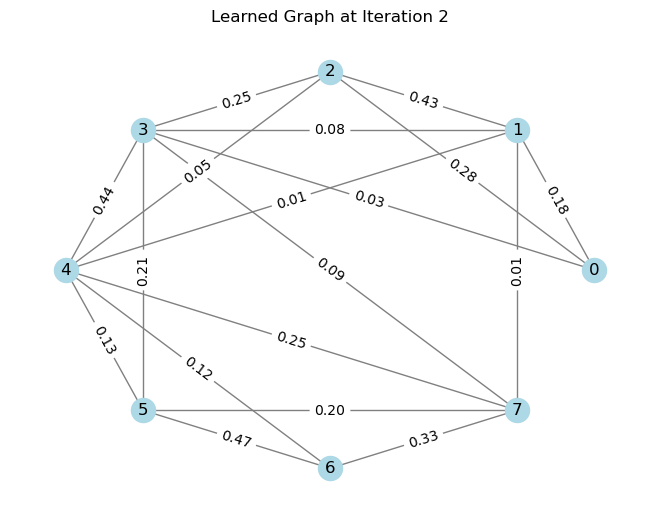

Iteration 3/5
after E-step: delta_W norm 0.0818, GLR 5.3417, adj norm^2 13.8607
after M-step-1: delta_W norm 0.1215, GLR 5.3830, adj norm^2 14.2793
PGD iter 1/50, ||S_new - S||_F = 0.3515
PGD iter 21/50, ||S_new - S||_F = 0.1626
PGD iter 41/50, ||S_new - S||_F = 0.0325
tensor([[0.0000e+00, 2.1659e-01, 2.2778e-01, 0.0000e+00, 9.8308e-04, 0.0000e+00,
         0.0000e+00, 0.0000e+00],
        [2.1659e-01, 0.0000e+00, 2.2816e-01, 4.5022e-02, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 1.2645e-05],
        [2.2778e-01, 2.2816e-01, 0.0000e+00, 1.8234e-01, 3.2155e-03, 0.0000e+00,
         0.0000e+00, 0.0000e+00],
        [0.0000e+00, 4.5022e-02, 1.8234e-01, 0.0000e+00, 2.5738e-01, 1.4315e-01,
         0.0000e+00, 3.5619e-02],
        [9.8308e-04, 0.0000e+00, 3.2155e-03, 2.5738e-01, 0.0000e+00, 2.6946e-01,
         1.6252e-01, 1.6560e-01],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 1.4315e-01, 2.6946e-01, 0.0000e+00,
         2.1287e-01, 7.2443e-02],
        [0.0000e+00, 0.0000e+00, 0.0000e

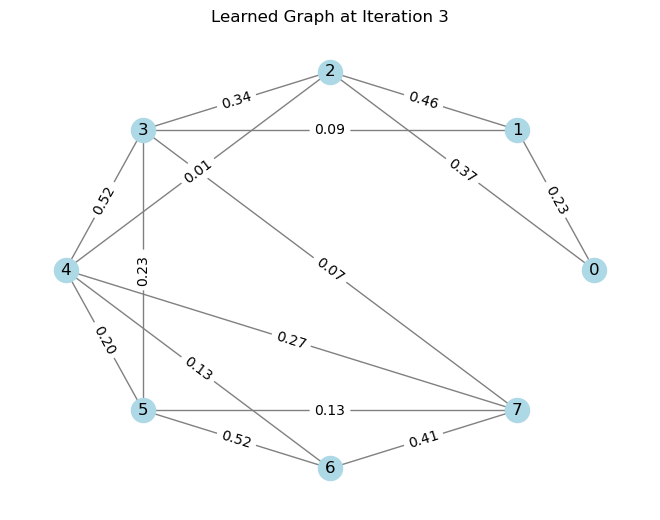

Iteration 4/5
after E-step: delta_W norm 0.1192, GLR 4.9714, adj norm^2 13.7366
after M-step-1: delta_W norm 0.1103, GLR 4.9946, adj norm^2 14.2061
PGD iter 1/50, ||S_new - S||_F = 0.4432
PGD iter 21/50, ||S_new - S||_F = 0.1372
PGD iter 41/50, ||S_new - S||_F = 0.0247
tensor([[0.0000, 0.1780, 0.1992, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.1780, 0.0000, 0.1793, 0.0335, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.1992, 0.1793, 0.0000, 0.1561, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0335, 0.1561, 0.0000, 0.2077, 0.1116, 0.0000, 0.0394],
        [0.0000, 0.0000, 0.0000, 0.2077, 0.0000, 0.2687, 0.1258, 0.1223],
        [0.0000, 0.0000, 0.0000, 0.1116, 0.2687, 0.0000, 0.1799, 0.0386],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.1258, 0.1799, 0.0000, 0.1922],
        [0.0000, 0.0000, 0.0000, 0.0394, 0.1223, 0.0386, 0.1922, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 4 tensor(3.4502, grad_fn=<PowBackward0>)


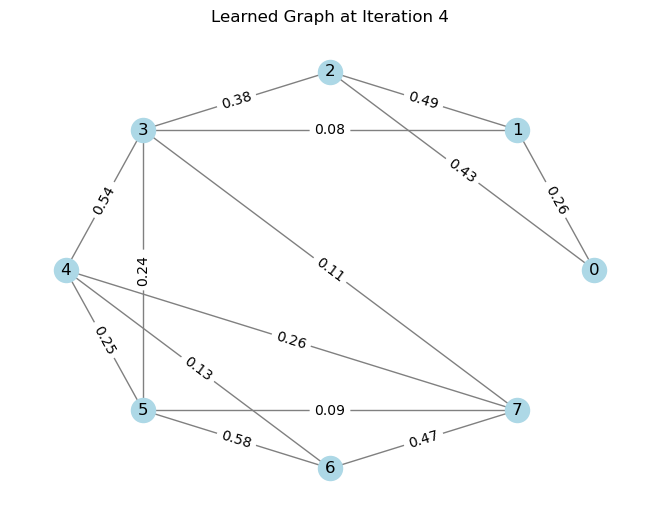

Iteration 5/5
after E-step: delta_W norm 0.1116, GLR 4.9277, adj norm^2 13.7164
after M-step-1: delta_W norm 0.1050, GLR 4.9446, adj norm^2 14.1460
PGD iter 1/50, ||S_new - S||_F = 0.5170
PGD iter 21/50, ||S_new - S||_F = 0.1186
PGD iter 41/50, ||S_new - S||_F = 0.0221
tensor([[0.0000, 0.1537, 0.1839, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.1537, 0.0000, 0.1591, 0.0260, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.1839, 0.1591, 0.0000, 0.1374, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0260, 0.1374, 0.0000, 0.1792, 0.0952, 0.0000, 0.0377],
        [0.0000, 0.0000, 0.0000, 0.1792, 0.0000, 0.2635, 0.0929, 0.1024],
        [0.0000, 0.0000, 0.0000, 0.0952, 0.2635, 0.0000, 0.1639, 0.0274],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0929, 0.1639, 0.0000, 0.1782],
        [0.0000, 0.0000, 0.0000, 0.0377, 0.1024, 0.0274, 0.1782, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 5 tensor(3.9962, grad_fn=<PowBackward0>)


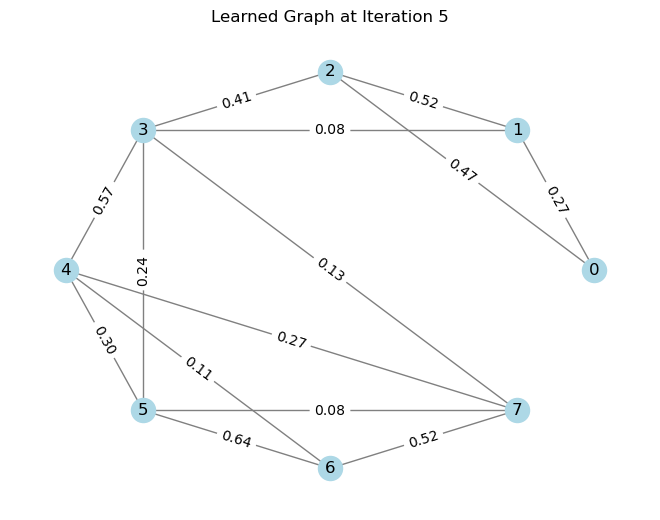

Final learned adjacency matrix:
tensor([[0.0000, 0.2651, 0.4742, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2651, 0.0000, 0.5248, 0.0796, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.4742, 0.5248, 0.0000, 0.4052, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0796, 0.4052, 0.0000, 0.5700, 0.2418, 0.0000, 0.1268],
        [0.0000, 0.0000, 0.0000, 0.5700, 0.0000, 0.3008, 0.1134, 0.2680],
        [0.0000, 0.0000, 0.0000, 0.2418, 0.3008, 0.0000, 0.6367, 0.0780],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.1134, 0.6367, 0.0000, 0.5205],
        [0.0000, 0.0000, 0.0000, 0.1268, 0.2680, 0.0780, 0.5205, 0.0000]],
       grad_fn=<MulBackward0>) tensor(3.9962, grad_fn=<PowBackward0>)


In [8]:
arg_dict = {
    'mu': 0.2,
    'gamma': 0.8,
    'step_size': 0.02,
    'c': 5,
    'PGD_iters': 50,
    'use_block_coordinate': False,
    'PGD_step_size': 0.02
}
Experiment(arg_dict, num_nodes, S_init=None, seed=42)

Iteration 1/5
after E-step: delta_W norm 0.1767, GLR 10.9611, adj norm^2 15.3861
after M-step-1: delta_W norm 0.0439, GLR 10.8080, adj norm^2 15.3495
PGD iter 1/50, ||S_new - S||_F = 0.0859
PGD iter 21/50, ||S_new - S||_F = 0.0767
PGD iter 41/50, ||S_new - S||_F = 0.0635
tensor([[0.0000, 0.7361, 0.7913, 0.5632, 0.3844, 0.5291, 0.4806, 0.4251],
        [0.7361, 0.0000, 0.7852, 0.4580, 0.2741, 0.3469, 0.2398, 0.1432],
        [0.7913, 0.7852, 0.0000, 0.6189, 0.3772, 0.5201, 0.4081, 0.2922],
        [0.5632, 0.4580, 0.6189, 0.0000, 0.7928, 0.7081, 0.5541, 0.5966],
        [0.3844, 0.2741, 0.3772, 0.7928, 0.0000, 0.7013, 0.6756, 0.7330],
        [0.5291, 0.3469, 0.5201, 0.7081, 0.7013, 0.0000, 0.8407, 0.7104],
        [0.4806, 0.2398, 0.4081, 0.5541, 0.6756, 0.8407, 0.0000, 0.7732],
        [0.4251, 0.1432, 0.2922, 0.5966, 0.7330, 0.7104, 0.7732, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 1 tensor(1.8993, grad_fn=<PowBackward0>)


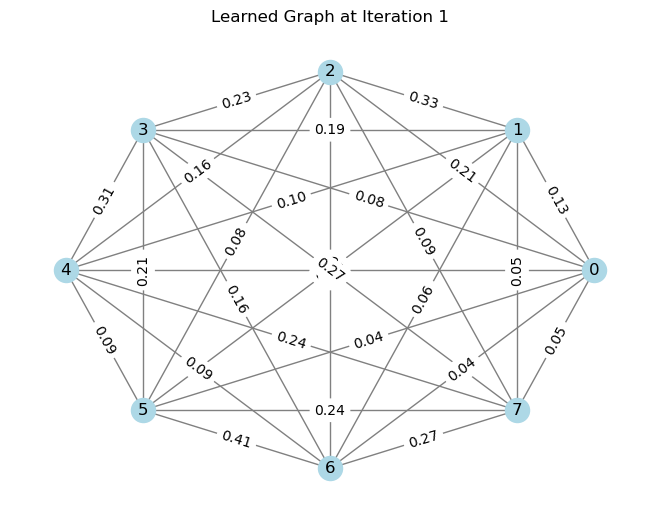

Iteration 2/5
after E-step: delta_W norm 0.0559, GLR 9.4276, adj norm^2 14.8132
after M-step-1: delta_W norm 0.0764, GLR 9.3160, adj norm^2 14.5432
PGD iter 1/50, ||S_new - S||_F = 0.1458
PGD iter 21/50, ||S_new - S||_F = 0.1268
PGD iter 41/50, ||S_new - S||_F = 0.0668
tensor([[0.0000, 0.7056, 0.7218, 0.4026, 0.0399, 0.3508, 0.2479, 0.1650],
        [0.7056, 0.0000, 0.7496, 0.1984, 0.0000, -0.0000, -0.0000, -0.0000],
        [0.7218, 0.7496, 0.0000, 0.4459, 0.0227, 0.2748, 0.0523, -0.0000],
        [0.4026, 0.1984, 0.4459, 0.0000, 0.7400, 0.5969, 0.3434, 0.3855],
        [0.0399, 0.0000, 0.0227, 0.7400, 0.0000, 0.6957, 0.6367, 0.6552],
        [0.3508, -0.0000, 0.2748, 0.5969, 0.6957, 0.0000, 0.7399, 0.5876],
        [0.2479, -0.0000, 0.0523, 0.3434, 0.6367, 0.7399, 0.0000, 0.6995],
        [0.1650, -0.0000, -0.0000, 0.3855, 0.6552, 0.5876, 0.6995, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 2 tensor(3.3783, grad_fn=<PowBackward0>)


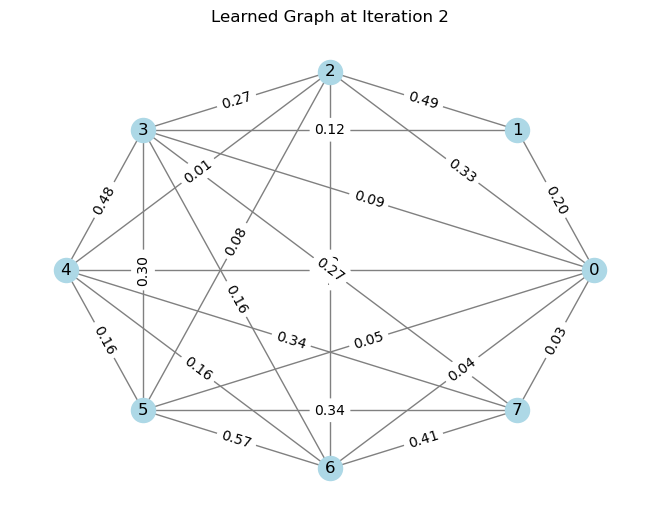

Iteration 3/5
after E-step: delta_W norm 0.0638, GLR 6.5367, adj norm^2 14.0474
after M-step-1: delta_W norm 0.2207, GLR 6.8683, adj norm^2 14.8081
PGD iter 1/50, ||S_new - S||_F = 0.2109
PGD iter 21/50, ||S_new - S||_F = 0.1737
PGD iter 41/50, ||S_new - S||_F = 0.0427
tensor([[0.0000, 0.6487, 0.6552, 0.2256, 0.0000, 0.1221, -0.0000, -0.0000],
        [0.6487, 0.0000, 0.6972, 0.0616, 0.0000, 0.0000, -0.0000, -0.0000],
        [0.6552, 0.6972, 0.0000, 0.3777, 0.0000, 0.1220, -0.0000, -0.0000],
        [0.2256, 0.0616, 0.3777, 0.0000, 0.6890, 0.5537, 0.2233, 0.2436],
        [0.0000, 0.0000, 0.0000, 0.6890, 0.0000, 0.6966, 0.6269, 0.6212],
        [0.1221, 0.0000, 0.1220, 0.5537, 0.6966, 0.0000, 0.6938, 0.5292],
        [-0.0000, -0.0000, -0.0000, 0.2233, 0.6269, 0.6938, 0.0000, 0.6730],
        [-0.0000, -0.0000, -0.0000, 0.2436, 0.6212, 0.5292, 0.6730, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 3 tensor(4.1047, grad_fn=<PowBackward0>)


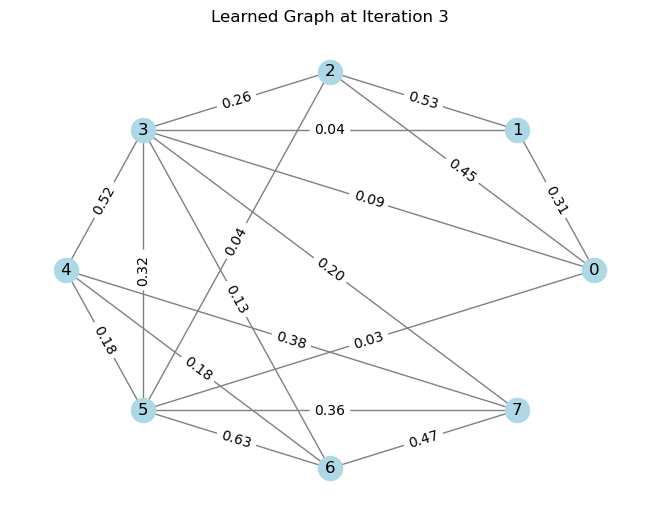

Iteration 4/5
after E-step: delta_W norm 0.2065, GLR 5.3712, adj norm^2 13.8477
after M-step-1: delta_W norm 0.1270, GLR 5.4447, adj norm^2 14.3513
PGD iter 1/50, ||S_new - S||_F = 0.2396
PGD iter 21/50, ||S_new - S||_F = 0.1652
PGD iter 41/50, ||S_new - S||_F = 0.0427
tensor([[0.0000, 0.6708, 0.6717, 0.2261, -0.0000, 0.1071, -0.0000, -0.0000],
        [0.6708, 0.0000, 0.6824, 0.0345, 0.0000, 0.0000, -0.0000, -0.0000],
        [0.6717, 0.6824, 0.0000, 0.3544, 0.0000, 0.0655, -0.0000, -0.0000],
        [0.2261, 0.0345, 0.3544, 0.0000, 0.6536, 0.5113, 0.1240, 0.1315],
        [-0.0000, 0.0000, 0.0000, 0.6536, 0.0000, 0.6906, 0.6078, 0.5800],
        [0.1071, 0.0000, 0.0655, 0.5113, 0.6906, 0.0000, 0.6519, 0.4757],
        [-0.0000, -0.0000, -0.0000, 0.1240, 0.6078, 0.6519, 0.0000, 0.6456],
        [-0.0000, -0.0000, -0.0000, 0.1315, 0.5800, 0.4757, 0.6456, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 4 tensor(4.4999, grad_fn=<PowBackward0>)


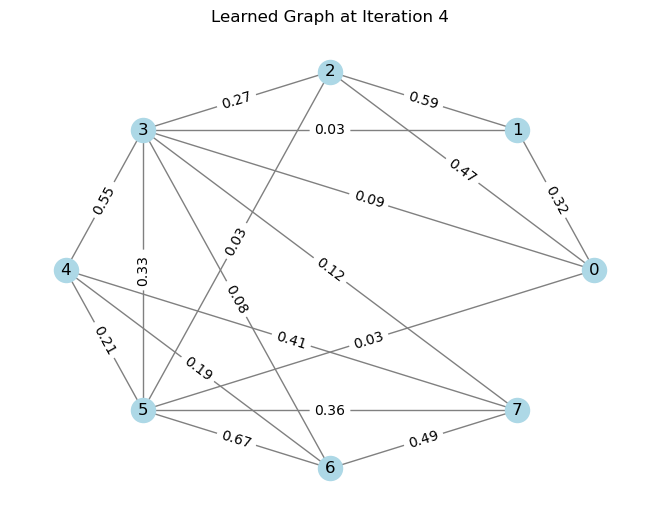

Iteration 5/5
after E-step: delta_W norm 0.1347, GLR 5.1677, adj norm^2 13.7764
after M-step-1: delta_W norm 0.1121, GLR 5.2342, adj norm^2 14.1692
PGD iter 1/50, ||S_new - S||_F = 0.2537
PGD iter 21/50, ||S_new - S||_F = 0.1596
PGD iter 41/50, ||S_new - S||_F = 0.0376
tensor([[0.0000, 0.6650, 0.6651, 0.2219, 0.0000, 0.0883, -0.0000, -0.0000],
        [0.6650, 0.0000, 0.6755, 0.0345, 0.0000, 0.0000, -0.0000, 0.0000],
        [0.6651, 0.6755, 0.0000, 0.3501, 0.0000, 0.0318, -0.0000, 0.0000],
        [0.2219, 0.0345, 0.3501, 0.0000, 0.6341, 0.4841, 0.0655, 0.0687],
        [0.0000, 0.0000, 0.0000, 0.6341, 0.0000, 0.6894, 0.5965, 0.5584],
        [0.0883, 0.0000, 0.0318, 0.4841, 0.6894, 0.0000, 0.6299, 0.4396],
        [-0.0000, -0.0000, -0.0000, 0.0655, 0.5965, 0.6299, 0.0000, 0.6285],
        [-0.0000, 0.0000, 0.0000, 0.0687, 0.5584, 0.4396, 0.6285, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 5 tensor(4.6997, grad_fn=<PowBackward0>)


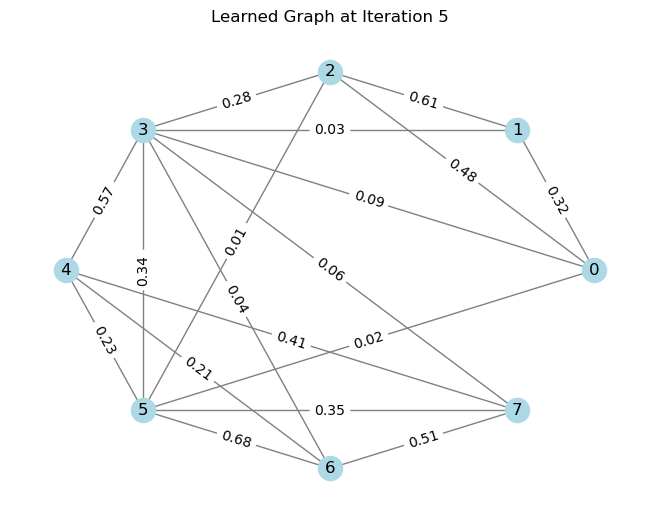

Final learned adjacency matrix:
tensor([[0.0000, 0.3192, 0.4785, 0.0863, 0.0000, 0.0220, -0.0000, -0.0000],
        [0.3192, 0.0000, 0.6130, 0.0285, 0.0000, 0.0000, -0.0000, 0.0000],
        [0.4785, 0.6130, 0.0000, 0.2847, 0.0000, 0.0135, -0.0000, 0.0000],
        [0.0863, 0.0285, 0.2847, 0.0000, 0.5720, 0.3352, 0.0431, 0.0643],
        [0.0000, 0.0000, 0.0000, 0.5720, 0.0000, 0.2254, 0.2055, 0.4106],
        [0.0220, 0.0000, 0.0135, 0.3352, 0.2254, 0.0000, 0.6788, 0.3544],
        [-0.0000, -0.0000, -0.0000, 0.0431, 0.2055, 0.6788, 0.0000, 0.5096],
        [-0.0000, 0.0000, 0.0000, 0.0643, 0.4106, 0.3544, 0.5096, 0.0000]],
       grad_fn=<MulBackward0>) tensor(4.6997, grad_fn=<PowBackward0>)


In [9]:
arg_dict = {
    'mu': 0.2,
    'gamma': 0.2,
    'step_size': 0.02,
    'c': 5,
    'PGD_iters': 50,
    'use_block_coordinate': False,
    'PGD_step_size': 0.04
}
Experiment(arg_dict, num_nodes, S_init=None, seed=42)

Iteration 1/5
after E-step: delta_W norm 0.1000, GLR 15.1975, adj norm^2 14.0939
after M-step-1: delta_W norm 0.2179, GLR 14.0953, adj norm^2 12.8015
PGD iter 1/50, ||S_new - S||_F = 0.0814
PGD iter 21/50, ||S_new - S||_F = 0.0766
PGD iter 41/50, ||S_new - S||_F = 0.0690
tensor([[0.0000, 0.6635, 0.6946, 0.5813, 0.4806, 0.5662, 0.5423, 0.5198],
        [0.6635, 0.0000, 0.6447, 0.4206, 0.2736, 0.3939, 0.3212, 0.2275],
        [0.6946, 0.6447, 0.0000, 0.5433, 0.3456, 0.5107, 0.4291, 0.3300],
        [0.5813, 0.4206, 0.5433, 0.0000, 0.6538, 0.6145, 0.5015, 0.5050],
        [0.4806, 0.2736, 0.3456, 0.6538, 0.0000, 0.6467, 0.6219, 0.6197],
        [0.5662, 0.3939, 0.5107, 0.6145, 0.6467, 0.0000, 0.6736, 0.5997],
        [0.5423, 0.3212, 0.4291, 0.5015, 0.6219, 0.6736, 0.0000, 0.6489],
        [0.5198, 0.2275, 0.3300, 0.5050, 0.6197, 0.5997, 0.6489, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 1 tensor(1.4655, grad_fn=<PowBackward0>)


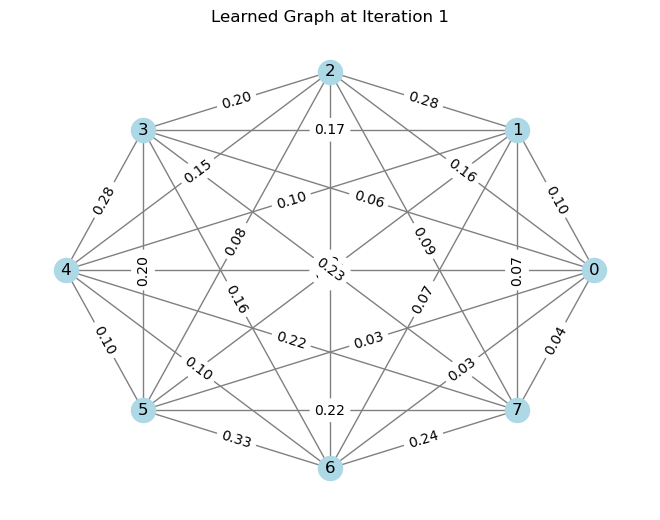

Iteration 2/5
after E-step: delta_W norm 0.2251, GLR 13.7380, adj norm^2 13.8143
after M-step-1: delta_W norm 0.1175, GLR 13.5623, adj norm^2 13.3158
PGD iter 1/50, ||S_new - S||_F = 0.1287
PGD iter 21/50, ||S_new - S||_F = 0.1199
PGD iter 41/50, ||S_new - S||_F = 0.0897
tensor([[0.0000, 0.5978, 0.5844, 0.4203, 0.1411, 0.3801, 0.3109, 0.2868],
        [0.5978, 0.0000, 0.5565, 0.1345, -0.0000, -0.0000, -0.0000, -0.0000],
        [0.5844, 0.5565, 0.0000, 0.3414, 0.0000, 0.2457, 0.0817, -0.0000],
        [0.4203, 0.1345, 0.3414, 0.0000, 0.5643, 0.4970, 0.3045, 0.3037],
        [0.1411, -0.0000, 0.0000, 0.5643, 0.0000, 0.6187, 0.5674, 0.5254],
        [0.3801, -0.0000, 0.2457, 0.4970, 0.6187, 0.0000, 0.5478, 0.4572],
        [0.3109, -0.0000, 0.0817, 0.3045, 0.5674, 0.5478, 0.0000, 0.5515],
        [0.2868, -0.0000, -0.0000, 0.3037, 0.5254, 0.4572, 0.5515, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 2 tensor(2.7427, grad_fn=<PowBackward0>)


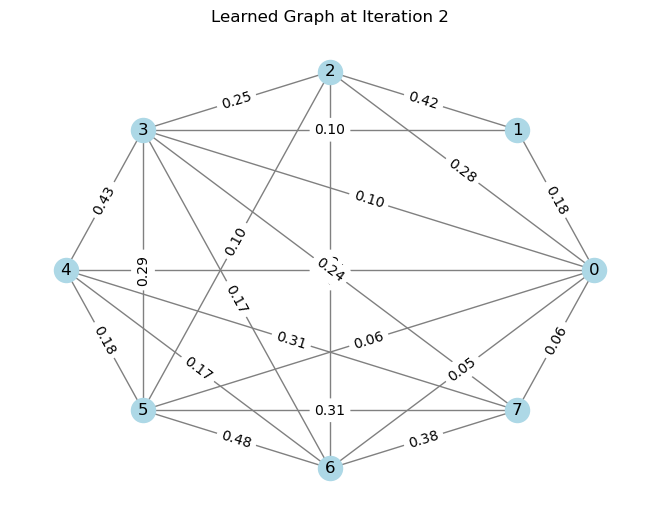

Iteration 3/5
after E-step: delta_W norm 0.1205, GLR 9.0785, adj norm^2 13.3512
after M-step-1: delta_W norm 0.4782, GLR 9.9664, adj norm^2 13.9862
PGD iter 1/50, ||S_new - S||_F = 0.1749
PGD iter 21/50, ||S_new - S||_F = 0.1612
PGD iter 41/50, ||S_new - S||_F = 0.0692
tensor([[0.0000, 0.4485, 0.4330, 0.0997, 0.0000, 0.1360, -0.0000, -0.0000],
        [0.4485, 0.0000, 0.4913, 0.0027, 0.0000, -0.0000, -0.0000, -0.0000],
        [0.4330, 0.4913, 0.0000, 0.2762, 0.0000, 0.1608, -0.0000, -0.0000],
        [0.0997, 0.0027, 0.2762, 0.0000, 0.5325, 0.4470, 0.1749, 0.1749],
        [0.0000, 0.0000, 0.0000, 0.5325, 0.0000, 0.6158, 0.5634, 0.4890],
        [0.1360, -0.0000, 0.1608, 0.4470, 0.6158, 0.0000, 0.4825, 0.3989],
        [-0.0000, -0.0000, -0.0000, 0.1749, 0.5634, 0.4825, 0.0000, 0.5132],
        [-0.0000, -0.0000, -0.0000, 0.1749, 0.4890, 0.3989, 0.5132, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 3 tensor(3.3926, grad_fn=<PowBackward0>)


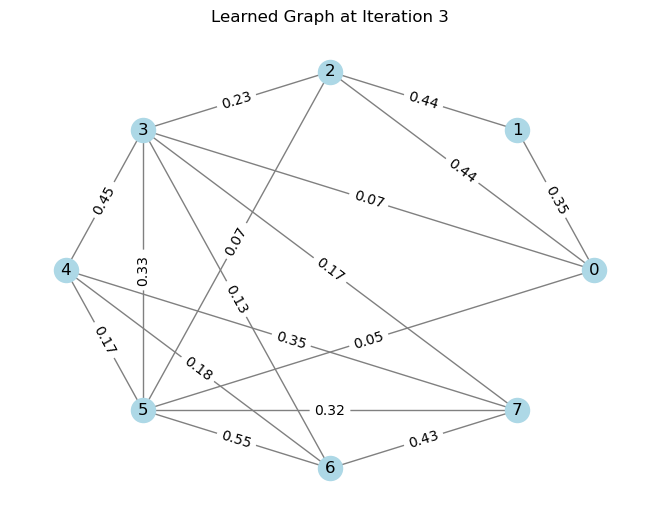

Iteration 4/5
after E-step: delta_W norm 0.3962, GLR 6.8339, adj norm^2 13.1853
after M-step-1: delta_W norm 0.1395, GLR 6.9521, adj norm^2 13.4822
PGD iter 1/50, ||S_new - S||_F = 0.2042
PGD iter 21/50, ||S_new - S||_F = 0.1847
PGD iter 41/50, ||S_new - S||_F = 0.0616
tensor([[0.0000, 0.4975, 0.4552, 0.1571, -0.0000, 0.1017, -0.0000, -0.0000],
        [0.4975, 0.0000, 0.4378, 0.0037, 0.0000, 0.0000, -0.0000, 0.0000],
        [0.4552, 0.4378, 0.0000, 0.2109, 0.0000, 0.0650, -0.0000, 0.0000],
        [0.1571, 0.0037, 0.2109, 0.0000, 0.4527, 0.3769, 0.0469, 0.0306],
        [-0.0000, 0.0000, 0.0000, 0.4527, 0.0000, 0.5918, 0.5121, 0.4037],
        [0.1017, 0.0000, 0.0650, 0.3769, 0.5918, 0.0000, 0.4102, 0.2975],
        [-0.0000, -0.0000, -0.0000, 0.0469, 0.5121, 0.4102, 0.0000, 0.4492],
        [-0.0000, 0.0000, 0.0000, 0.0306, 0.4037, 0.2975, 0.4492, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 4 tensor(3.7728, grad_fn=<PowBackward0>)


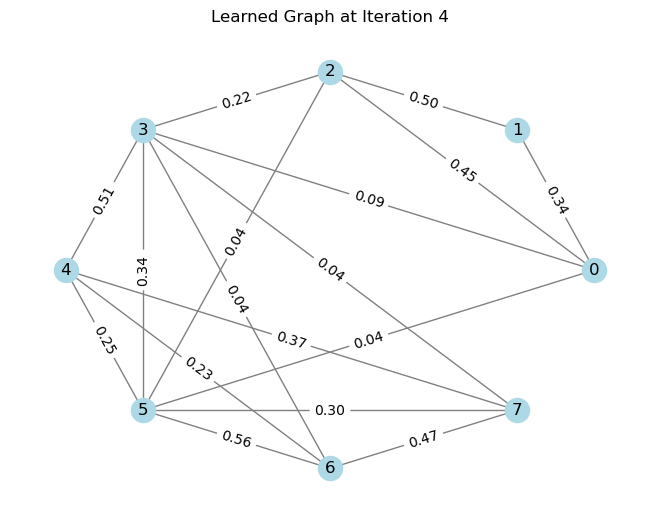

Iteration 5/5
after E-step: delta_W norm 0.1669, GLR 6.4222, adj norm^2 13.1155
after M-step-1: delta_W norm 0.0524, GLR 6.4711, adj norm^2 13.1932
PGD iter 1/50, ||S_new - S||_F = 0.2317
PGD iter 21/50, ||S_new - S||_F = 0.1856
PGD iter 41/50, ||S_new - S||_F = 0.0554
tensor([[0.0000e+00, 4.9687e-01, 4.4868e-01, 1.7874e-01, -0.0000e+00, 1.0432e-01,
         -0.0000e+00, -0.0000e+00],
        [4.9687e-01, 0.0000e+00, 3.9308e-01, 1.1375e-02, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00],
        [4.4868e-01, 3.9308e-01, 0.0000e+00, 1.8849e-01, 0.0000e+00, 3.1856e-04,
         0.0000e+00, 0.0000e+00],
        [1.7874e-01, 1.1375e-02, 1.8849e-01, 0.0000e+00, 4.0916e-01, 3.2413e-01,
         -0.0000e+00, 0.0000e+00],
        [-0.0000e+00, 0.0000e+00, 0.0000e+00, 4.0916e-01, 0.0000e+00, 5.8112e-01,
         4.8528e-01, 3.5093e-01],
        [1.0432e-01, 0.0000e+00, 3.1857e-04, 3.2413e-01, 5.8112e-01, 0.0000e+00,
         3.5079e-01, 2.2103e-01],
        [-0.0000e+00, 0.0000e+00, 0

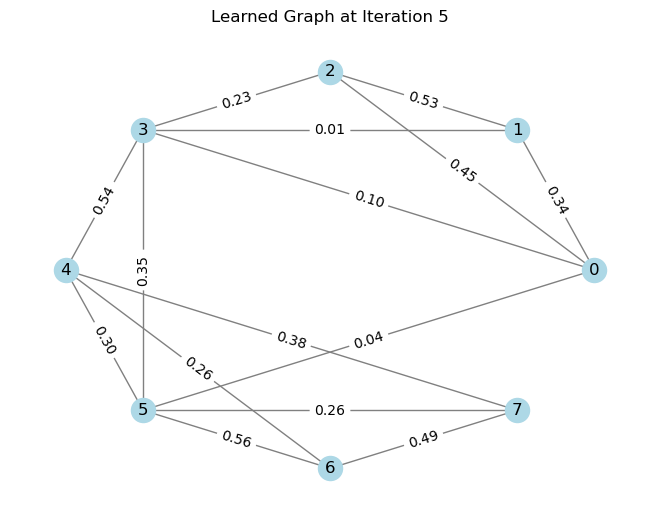

Final learned adjacency matrix:
tensor([[0.0000e+00, 3.3766e-01, 4.5154e-01, 9.7973e-02, -0.0000e+00, 3.8226e-02,
         -0.0000e+00, -0.0000e+00],
        [3.3766e-01, 0.0000e+00, 5.3371e-01, 1.4282e-02, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00],
        [4.5154e-01, 5.3371e-01, 0.0000e+00, 2.3232e-01, 0.0000e+00, 2.1235e-04,
         0.0000e+00, 0.0000e+00],
        [9.7973e-02, 1.4282e-02, 2.3232e-01, 0.0000e+00, 5.4392e-01, 3.4774e-01,
         -0.0000e+00, 0.0000e+00],
        [-0.0000e+00, 0.0000e+00, 0.0000e+00, 5.4392e-01, 0.0000e+00, 2.9695e-01,
         2.6226e-01, 3.8177e-01],
        [3.8226e-02, 0.0000e+00, 2.1235e-04, 3.4774e-01, 2.9695e-01, 0.0000e+00,
         5.5673e-01, 2.6493e-01],
        [-0.0000e+00, 0.0000e+00, 0.0000e+00, -0.0000e+00, 2.6226e-01, 5.5673e-01,
         0.0000e+00, 4.9332e-01],
        [-0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 3.8177e-01, 2.6493e-01,
         4.9332e-01, 0.0000e+00]], grad_fn=<MulBackward0>) tensor(4.0219, 

In [10]:
arg_dict = {
    'mu': 0.1,
    'gamma': 0.4,
    'step_size': 0.02,
    'c': 5,
    'PGD_iters': 50,
    'use_block_coordinate': False,
    'PGD_step_size': 0.02
}
Experiment(arg_dict, num_nodes, S_init=None, seed=42)

Iteration 1/5
after E-step: delta_W norm 0.2856, GLR 6.4618, adj norm^2 17.0118
after M-step-1: delta_W norm 0.1644, GLR 6.7223, adj norm^2 18.1153
PGD iter 1/50, ||S_new - S||_F = 0.0600
PGD iter 21/50, ||S_new - S||_F = 0.0568
PGD iter 41/50, ||S_new - S||_F = 0.0525
tensor([[0.0000, 0.6791, 0.7167, 0.6080, 0.5516, 0.5875, 0.5704, 0.5464],
        [0.6791, 0.0000, 0.7235, 0.6240, 0.5709, 0.5681, 0.5312, 0.5098],
        [0.7167, 0.7235, 0.0000, 0.6715, 0.6139, 0.6095, 0.5809, 0.5612],
        [0.6080, 0.6240, 0.6715, 0.0000, 0.7288, 0.6929, 0.6481, 0.6779],
        [0.5516, 0.5709, 0.6139, 0.7288, 0.0000, 0.6529, 0.6480, 0.6972],
        [0.5875, 0.5681, 0.6095, 0.6929, 0.6529, 0.0000, 0.7796, 0.7076],
        [0.5704, 0.5312, 0.5809, 0.6481, 0.6480, 0.7796, 0.0000, 0.7231],
        [0.5464, 0.5098, 0.5612, 0.6779, 0.6972, 0.7076, 0.7231, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 1 tensor(2.1789, grad_fn=<PowBackward0>)


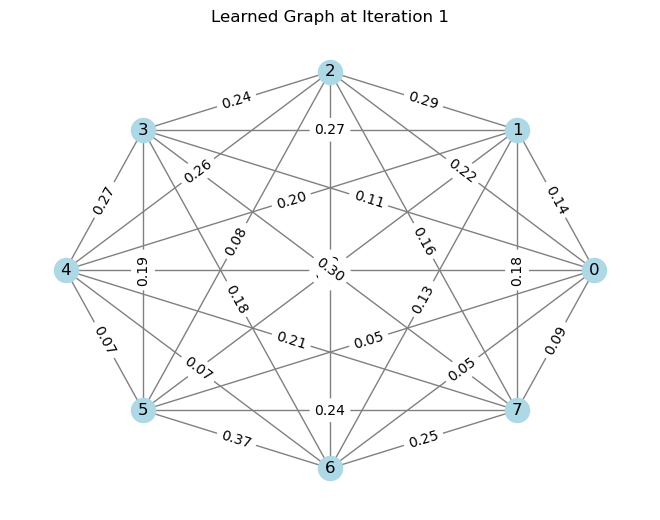

Iteration 2/5
after E-step: delta_W norm 0.1553, GLR 6.3353, adj norm^2 16.9401
after M-step-1: delta_W norm 0.1070, GLR 6.4717, adj norm^2 17.6761
PGD iter 1/50, ||S_new - S||_F = 0.0714
PGD iter 21/50, ||S_new - S||_F = 0.0674
PGD iter 41/50, ||S_new - S||_F = 0.0617
tensor([[0.0000, 0.6599, 0.6915, 0.5639, 0.4636, 0.5430, 0.5142, 0.4813],
        [0.6599, 0.0000, 0.6973, 0.5430, 0.4637, 0.4527, 0.3938, 0.3677],
        [0.6915, 0.6973, 0.0000, 0.6128, 0.4998, 0.5445, 0.4876, 0.4414],
        [0.5639, 0.5430, 0.6128, 0.0000, 0.7099, 0.6505, 0.5793, 0.6191],
        [0.4636, 0.4637, 0.4998, 0.7099, 0.0000, 0.6463, 0.6313, 0.6679],
        [0.5430, 0.4527, 0.5445, 0.6505, 0.6463, 0.0000, 0.7422, 0.6705],
        [0.5142, 0.3938, 0.4876, 0.5793, 0.6313, 0.7422, 0.0000, 0.6921],
        [0.4813, 0.3677, 0.4414, 0.6191, 0.6679, 0.6705, 0.6921, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 2 tensor(4.1467, grad_fn=<PowBackward0>)


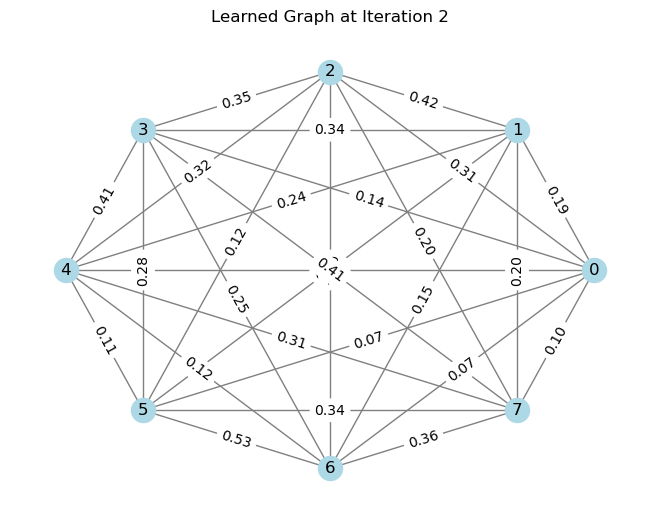

Iteration 3/5
after E-step: delta_W norm 0.1052, GLR 6.3312, adj norm^2 16.7561
after M-step-1: delta_W norm 0.1184, GLR 6.5251, adj norm^2 17.6432
PGD iter 1/50, ||S_new - S||_F = 0.0770
PGD iter 21/50, ||S_new - S||_F = 0.0726
PGD iter 41/50, ||S_new - S||_F = 0.0661
tensor([[0.0000, 0.6507, 0.6776, 0.5388, 0.4097, 0.5189, 0.4835, 0.4442],
        [0.6507, 0.0000, 0.6866, 0.4939, 0.4013, 0.3885, 0.3210, 0.2874],
        [0.6776, 0.6866, 0.0000, 0.5895, 0.4493, 0.5183, 0.4495, 0.3921],
        [0.5388, 0.4939, 0.5895, 0.0000, 0.7049, 0.6419, 0.5621, 0.5986],
        [0.4097, 0.4013, 0.4493, 0.7049, 0.0000, 0.6458, 0.6288, 0.6618],
        [0.5189, 0.3885, 0.5183, 0.6419, 0.6458, 0.0000, 0.7319, 0.6618],
        [0.4835, 0.3210, 0.4495, 0.5621, 0.6288, 0.7319, 0.0000, 0.6867],
        [0.4442, 0.2874, 0.3921, 0.5986, 0.6618, 0.6618, 0.6867, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 3 tensor(4.6125, grad_fn=<PowBackward0>)


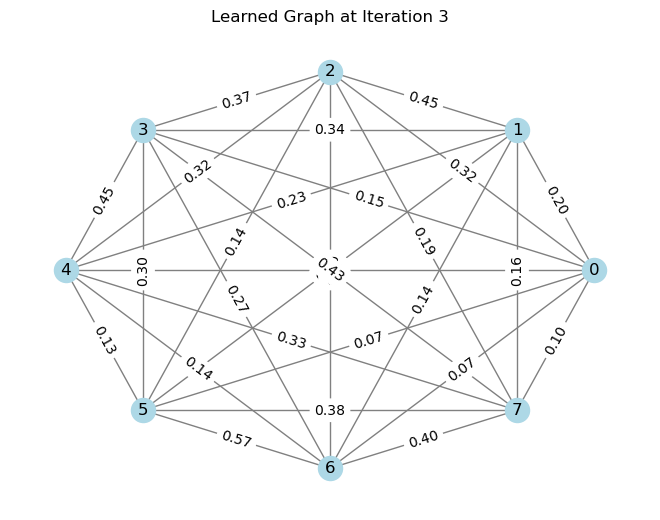

Iteration 4/5
after E-step: delta_W norm 0.1154, GLR 6.2326, adj norm^2 16.6304
after M-step-1: delta_W norm 0.1406, GLR 6.4284, adj norm^2 17.6983
PGD iter 1/50, ||S_new - S||_F = 0.0799
PGD iter 21/50, ||S_new - S||_F = 0.0754
PGD iter 41/50, ||S_new - S||_F = 0.0684
tensor([[0.0000, 0.6452, 0.6688, 0.5180, 0.3613, 0.5112, 0.4685, 0.4012],
        [0.6452, 0.0000, 0.6803, 0.4624, 0.3515, 0.3807, 0.2999, 0.2324],
        [0.6688, 0.6803, 0.0000, 0.5818, 0.4234, 0.5240, 0.4514, 0.3647],
        [0.5180, 0.4624, 0.5818, 0.0000, 0.7003, 0.6432, 0.5572, 0.5852],
        [0.3613, 0.3515, 0.4234, 0.7003, 0.0000, 0.6444, 0.6280, 0.6591],
        [0.5112, 0.3807, 0.5240, 0.6432, 0.6444, 0.0000, 0.7351, 0.6614],
        [0.4685, 0.2999, 0.4514, 0.5572, 0.6280, 0.7351, 0.0000, 0.6863],
        [0.4012, 0.2324, 0.3647, 0.5852, 0.6591, 0.6614, 0.6863, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 4 tensor(4.8094, grad_fn=<PowBackward0>)


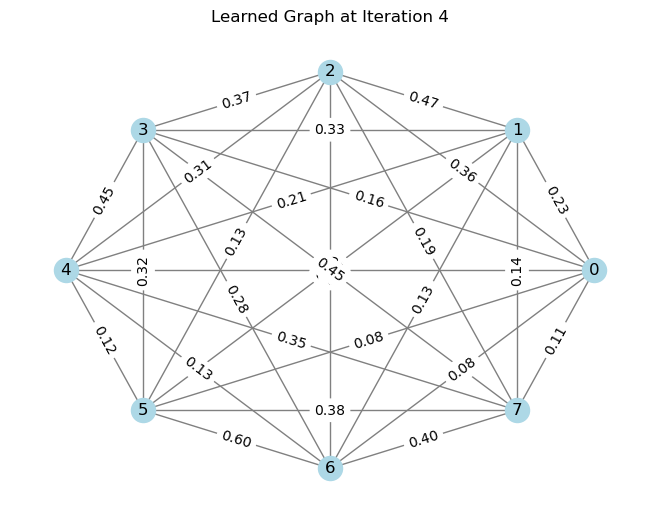

Iteration 5/5
after E-step: delta_W norm 0.1368, GLR 6.1991, adj norm^2 16.5387
after M-step-1: delta_W norm 0.1391, GLR 6.4011, adj norm^2 17.4727
PGD iter 1/50, ||S_new - S||_F = 0.0819
PGD iter 21/50, ||S_new - S||_F = 0.0772
PGD iter 41/50, ||S_new - S||_F = 0.0699
tensor([[0.0000, 0.6482, 0.6739, 0.5180, 0.3598, 0.5026, 0.4611, 0.4029],
        [0.6482, 0.0000, 0.6774, 0.4424, 0.3268, 0.3453, 0.2683, 0.2076],
        [0.6739, 0.6774, 0.0000, 0.5683, 0.3988, 0.5036, 0.4280, 0.3454],
        [0.5180, 0.4424, 0.5683, 0.0000, 0.6989, 0.6385, 0.5540, 0.5817],
        [0.3598, 0.3268, 0.3988, 0.6989, 0.0000, 0.6449, 0.6273, 0.6571],
        [0.5026, 0.3453, 0.5036, 0.6385, 0.6449, 0.0000, 0.7312, 0.6567],
        [0.4611, 0.2683, 0.4280, 0.5540, 0.6273, 0.7312, 0.0000, 0.6841],
        [0.4029, 0.2076, 0.3454, 0.5817, 0.6571, 0.6567, 0.6841, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 5 tensor(4.8680, grad_fn=<PowBackward0>)


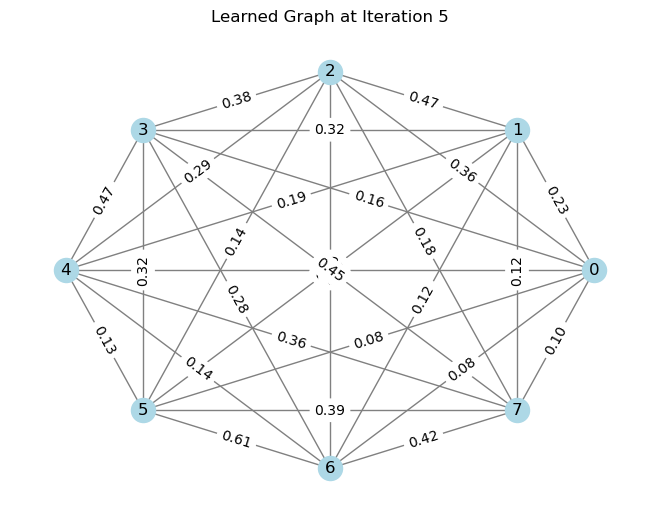

Final learned adjacency matrix:
tensor([[0.0000, 0.2268, 0.3635, 0.1642, 0.1617, 0.0793, 0.0785, 0.1048],
        [0.2268, 0.0000, 0.4714, 0.3167, 0.1936, 0.1509, 0.1168, 0.1216],
        [0.3635, 0.4714, 0.0000, 0.3765, 0.2932, 0.1409, 0.1307, 0.1772],
        [0.1642, 0.3167, 0.3765, 0.0000, 0.4739, 0.3175, 0.2762, 0.4458],
        [0.1617, 0.1936, 0.2932, 0.4739, 0.0000, 0.1338, 0.1431, 0.3576],
        [0.0793, 0.1509, 0.1409, 0.3175, 0.1338, 0.0000, 0.6095, 0.3937],
        [0.0785, 0.1168, 0.1307, 0.2762, 0.1431, 0.6095, 0.0000, 0.4163],
        [0.1048, 0.1216, 0.1772, 0.4458, 0.3576, 0.3937, 0.4163, 0.0000]],
       grad_fn=<MulBackward0>) tensor(4.8680, grad_fn=<PowBackward0>)


In [11]:
arg_dict = {
    'mu': 0.4,
    'gamma': 0.4,
    'step_size': 0.02,
    'c': 5,
    'PGD_iters': 50,
    'use_block_coordinate': False,
    'PGD_step_size': 0.02
}
Experiment(arg_dict, num_nodes, S_init=None, seed=42)

Iteration 1/5
after E-step: delta_W norm 0.1000, GLR 15.1975, adj norm^2 14.0939
after M-step-1: delta_W norm 0.2179, GLR 14.0953, adj norm^2 12.8015
PGD iter 1/50, ||S_new - S||_F = 0.1629
PGD iter 21/50, ||S_new - S||_F = 0.1379
PGD iter 41/50, ||S_new - S||_F = 0.0720
tensor([[0.0000, 0.4679, 0.5516, 0.2526, 0.1521, 0.1893, 0.1541, 0.1369],
        [0.4679, 0.0000, 0.5568, 0.2220, 0.0095, 0.0515, 0.0000, 0.0000],
        [0.5516, 0.5568, 0.0000, 0.3363, 0.0984, 0.1646, 0.0380, 0.0000],
        [0.2526, 0.2220, 0.3363, 0.0000, 0.5041, 0.3870, 0.1877, 0.2620],
        [0.1521, 0.0095, 0.0984, 0.5041, 0.0000, 0.3825, 0.3483, 0.4387],
        [0.1893, 0.0515, 0.1646, 0.3870, 0.3825, 0.0000, 0.5368, 0.3780],
        [0.1541, 0.0000, 0.0380, 0.1877, 0.3483, 0.5368, 0.0000, 0.4805],
        [0.1369, 0.0000, 0.0000, 0.2620, 0.4387, 0.3780, 0.4805, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 1 tensor(0.6654, grad_fn=<PowBackward0>)


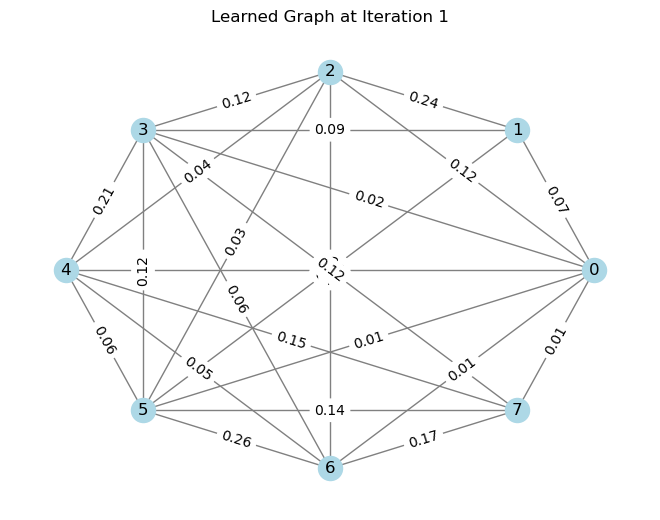

Iteration 2/5
after E-step: delta_W norm 0.1924, GLR 8.9251, adj norm^2 13.3693
after M-step-1: delta_W norm 0.2430, GLR 9.2649, adj norm^2 13.1705
PGD iter 1/50, ||S_new - S||_F = 0.3765
PGD iter 21/50, ||S_new - S||_F = 0.1238
PGD iter 41/50, ||S_new - S||_F = 0.0219
tensor([[0.0000, 0.3256, 0.3396, 0.0377, 0.0066, 0.0000, 0.0000, 0.0000],
        [0.3256, 0.0000, 0.3657, 0.0845, 0.0000, 0.0000, 0.0000, 0.0021],
        [0.3396, 0.3657, 0.0000, 0.2887, 0.0170, 0.0000, 0.0000, 0.0000],
        [0.0377, 0.0845, 0.2887, 0.0000, 0.3930, 0.2771, 0.0000, 0.0801],
        [0.0066, 0.0000, 0.0170, 0.3930, 0.0000, 0.3680, 0.2555, 0.2785],
        [0.0000, 0.0000, 0.0000, 0.2771, 0.3680, 0.0000, 0.3502, 0.1377],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.2555, 0.3502, 0.0000, 0.3470],
        [0.0000, 0.0021, 0.0000, 0.0801, 0.2785, 0.1377, 0.3470, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 2 tensor(2.1566, grad_fn=<PowBackward0>)


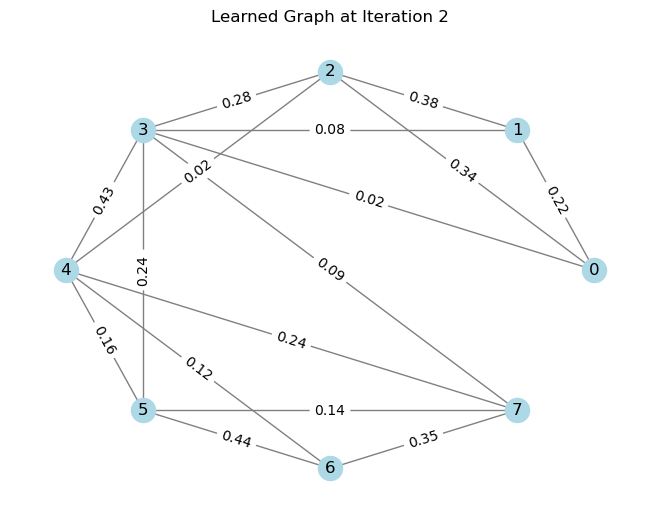

Iteration 3/5
after E-step: delta_W norm 0.2185, GLR 6.4572, adj norm^2 13.1530
after M-step-1: delta_W norm 0.0701, GLR 6.4789, adj norm^2 13.2550
PGD iter 1/50, ||S_new - S||_F = 0.5556
PGD iter 21/50, ||S_new - S||_F = 0.0856
PGD iter 41/50, ||S_new - S||_F = 0.0176
tensor([[0.0000, 0.2876, 0.3118, 0.0000, 0.0016, 0.0000, 0.0000, 0.0000],
        [0.2876, 0.0000, 0.2512, 0.0554, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3118, 0.2512, 0.0000, 0.2345, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0554, 0.2345, 0.0000, 0.2961, 0.1947, 0.0000, 0.0570],
        [0.0016, 0.0000, 0.0000, 0.2961, 0.0000, 0.3533, 0.1701, 0.1915],
        [0.0000, 0.0000, 0.0000, 0.1947, 0.3533, 0.0000, 0.2589, 0.0627],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.1701, 0.2589, 0.0000, 0.2794],
        [0.0000, 0.0000, 0.0000, 0.0570, 0.1915, 0.0627, 0.2794, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 3 tensor(2.9130, grad_fn=<PowBackward0>)


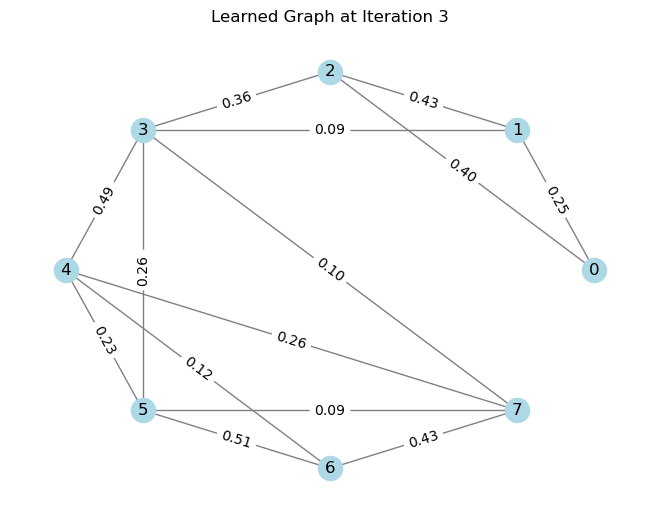

Iteration 4/5
after E-step: delta_W norm 0.0774, GLR 6.2330, adj norm^2 13.1185
after M-step-1: delta_W norm 0.0478, GLR 6.2378, adj norm^2 13.2236
PGD iter 1/50, ||S_new - S||_F = 0.7126
PGD iter 21/50, ||S_new - S||_F = 0.0626
PGD iter 41/50, ||S_new - S||_F = 0.0154
tensor([[0.0000, 0.2388, 0.2714, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2388, 0.0000, 0.2062, 0.0380, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2714, 0.2062, 0.0000, 0.1923, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0380, 0.1923, 0.0000, 0.2408, 0.1561, 0.0000, 0.0442],
        [0.0000, 0.0000, 0.0000, 0.2408, 0.0000, 0.3391, 0.1071, 0.1583],
        [0.0000, 0.0000, 0.0000, 0.1561, 0.3391, 0.0000, 0.2182, 0.0362],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.1071, 0.2182, 0.0000, 0.2415],
        [0.0000, 0.0000, 0.0000, 0.0442, 0.1583, 0.0362, 0.2415, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 4 tensor(3.4925, grad_fn=<PowBackward0>)


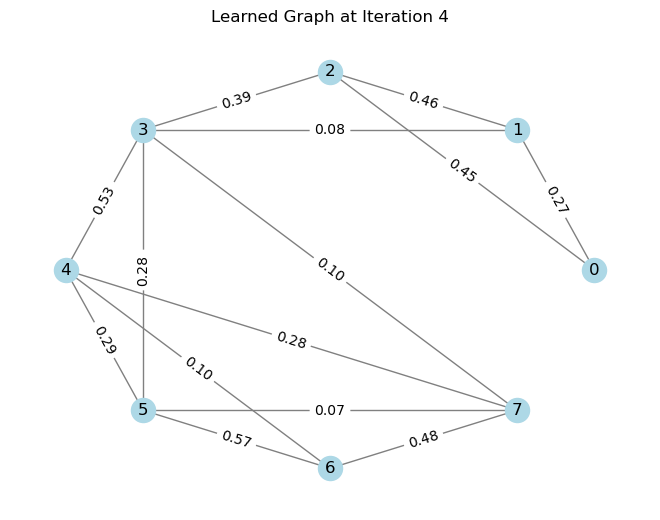

Iteration 5/5
after E-step: delta_W norm 0.0492, GLR 6.0945, adj norm^2 13.0985
after M-step-1: delta_W norm 0.0452, GLR 6.0982, adj norm^2 13.1936
PGD iter 1/50, ||S_new - S||_F = 0.8426
PGD iter 21/50, ||S_new - S||_F = 0.0503
PGD iter 41/50, ||S_new - S||_F = 0.0144
tensor([[0.0000, 0.2056, 0.2416, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2056, 0.0000, 0.1811, 0.0288, 0.0000, 0.0000, -0.0000, 0.0000],
        [0.2416, 0.1811, 0.0000, 0.1680, 0.0000, 0.0000, -0.0000, 0.0000],
        [0.0000, 0.0288, 0.1680, 0.0000, 0.2115, 0.1368, -0.0000, 0.0342],
        [0.0000, 0.0000, 0.0000, 0.2115, 0.0000, 0.3273, 0.0655, 0.1462],
        [0.0000, 0.0000, 0.0000, 0.1368, 0.3273, 0.0000, 0.1954, 0.0219],
        [0.0000, -0.0000, -0.0000, -0.0000, 0.0655, 0.1954, 0.0000, 0.2189],
        [0.0000, 0.0000, 0.0000, 0.0342, 0.1462, 0.0219, 0.2189, 0.0000]],
       grad_fn=<CopySlices>)
W norm^2 at Iteration 5 tensor(3.9508, grad_fn=<PowBackward0>)


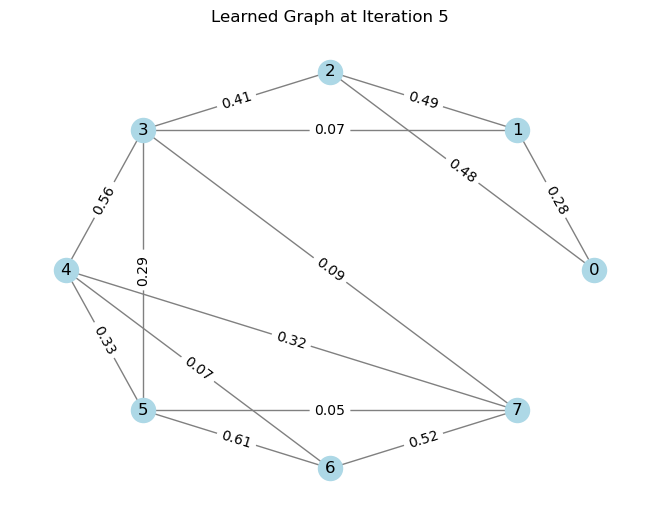

Final learned adjacency matrix:
tensor([[0.0000, 0.2766, 0.4751, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2766, 0.0000, 0.4892, 0.0723, 0.0000, 0.0000, -0.0000, 0.0000],
        [0.4751, 0.4892, 0.0000, 0.4120, 0.0000, 0.0000, -0.0000, 0.0000],
        [0.0000, 0.0723, 0.4120, 0.0000, 0.5553, 0.2888, -0.0000, 0.0939],
        [0.0000, 0.0000, 0.0000, 0.5553, 0.0000, 0.3280, 0.0692, 0.3156],
        [0.0000, 0.0000, 0.0000, 0.2888, 0.3280, 0.0000, 0.6099, 0.0509],
        [0.0000, -0.0000, -0.0000, -0.0000, 0.0692, 0.6099, 0.0000, 0.5212],
        [0.0000, 0.0000, 0.0000, 0.0939, 0.3156, 0.0509, 0.5212, 0.0000]],
       grad_fn=<MulBackward0>) tensor(3.9508, grad_fn=<PowBackward0>)


In [12]:
arg_dict = {
    'mu': 0.1,
    'gamma': 0.4,
    'step_size': 0.02,
    'c': 5,
    'PGD_iters': 50,
    'use_block_coordinate': False,
    'PGD_step_size': 0.04
}
Experiment(arg_dict, num_nodes, S_init=None, seed=42)